In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import glob
import os
import numpy as np

import argparse
import logging
import multiprocessing
import sys  # , os
from pathlib import Path
from sys import platform

# from mcsas3.mcmodelhistogrammer import McModelHistogrammer
# from mcsas3.mcanalysis import McAnalysis
import yaml
from attrs import define, field, validators

from mcsas3 import McData1D, McPlot  # , McData2D
from mcsas3 import McHat
from mcsas3.mcanalysis import McAnalysis

# set up filepaths and config

In [3]:
usaxs_fp = "/Users/bgpelkie/My Drive/Research/PozzoResearchGroup/APS_Beamtime_Sp25/BatchSamplesData/Reduced_ascii_4_18_25_emptyBlank_renamed"
usaxs_paths = os.listdir(usaxs_fp)

In [4]:
sample_table = pd.read_csv("/Users/bgpelkie/My Drive/Research/PozzoResearchGroup/APS_Beamtime_Sp25/APS_sample_reference_cartridgebatch.csv")


In [5]:
usaxs_files = {}
for i, row in sample_table.iloc[0:73].iterrows():
    sample_uid = row['Sample ID']


    if sample_uid is not np.nan:
        usaxs_filename = glob.glob(os.path.join(usaxs_fp, f'*{sample_uid}*'))
        
        if len(usaxs_filename) == 0:
            print(f'Warning: No files found for sample {sample_uid}')
            continue
        usaxs_files[sample_uid] = usaxs_filename[0]

## copy and re-header files for mcsas

In [6]:
q_max = 5e-2

In [7]:
new_fp_root = '/Users/bgpelkie/My Drive/Research/PozzoResearchGroup/APS_Beamtime_Sp25/BatchSamplesData/McSAS_reduced_nm'
new_cols = {'Qvector_A':'Q', 'Intensity':'I', 'Uncertainty':'ISigma'}

In [8]:
usaxs_files_mcsas = {}
for uid, fp in usaxs_files.items():
    fn = fp.split('/')[-1]
    usaxs_files_mcsas[uid] = f'{new_fp_root}/{fn}'

In [28]:
test_fp = list(usaxs_files_mcsas.values())[0]

hist_result_file = Path().absolute().parent / "test.nxs"

In [39]:
hist_result_file

PosixPath('/Users/bgpelkie/Code/silica-np-synthesis/APS_data_analysis/test.nxs')

In [29]:
hist_result_file

PosixPath('/Users/bgpelkie/Code/silica-np-synthesis/APS_data_analysis/test.nxs')

In [9]:
read_config_fp = './read_config_csv.yaml'
run_config_fp = './run_config_brian.yaml'
hist_config_fp = './hist_config_dual.yaml'

In [ ]:
for sample_uid, fp in usaxs_files_mcsas.items():
    print(f"Starting sample {fp.split('/')[-1].split('.')[0]}")
    dataFile = fp
    resultIndex = 1
    result_file = f"mcsas_usaxs_fits_fractal/{fp.split('/')[-1].split('.')[0]}.nxs"
    n_threads = 8
    
    
    # read the configuration file
    with open(read_config_fp, "r") as f:
        readDict = yaml.safe_load(f)
    # load the data
    mds = McData1D.McData1D(filename=dataFile, resultIndex=resultIndex, **readDict)
    # store the full data in the result file:
    mds.store(result_file)
    # read the configuration file
    with open(run_config_fp, "r") as f:
        optDict = yaml.safe_load(f)
    if n_threads > 0:
        optDict["nCores"] = n_threads
    # run the Monte Carlo method
    mh = McHat.McHat(seed=None, resultIndex=resultIndex, **optDict)
    md = mds.measData.copy()
    mh.run(md, result_file, resultIndex = resultIndex)
    break

Starting sample 2_5dfdbe5e-3f38-44de-b9db-65c72c27f02e_A3_1_2036


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/bgpelkie/miniconda3/envs/mcsas/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/bgpelkie/miniconda3/envs/mcsas/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bgpelkie/miniconda3/envs/mcsas/lib/python3.11/multiprocessing/spawn.py", line 132, in _main
    exitcode = _main(fd, parent_sentinel)
    self = reduction.pickle.load(from_parent)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bgpelkie/miniconda3/envs/mcsas/lib/python3.11/multiprocessing/spawn.py", line 132, in _main
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ModuleNotFoundError: No module named 'mcsas3.McHat'
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ModuleNotF

In [44]:
hist_result_file = Path().absolute() / "mcsas_usaxs_hists" / "test.nxs"

In [45]:
hist_result_file

PosixPath('/Users/bgpelkie/Code/silica-np-synthesis/APS_data_analysis/mcsas_fit/mcsas_usaxs_hists/test.nxs')

Starting sample 2_5dfdbe5e-3f38-44de-b9db-65c72c27f02e_A3_1_2036
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q             I        ISigma
0    0.000253  32473.332587   1441.400121
1    0.000262  31848.745324   4478.965097
2    0.000267  31998.990795   9107.494474
3    0.000271  31360.587261  11580.730803
4    0.000276  31667.541185   9066.726254
..        ...           ...           ...
364  0.047170      0.270264      0.004895
365  0.047813      0.258061      0.005305
366  0.048474      0.306912      0.005295
367  0.049141      0.174658      0.004933
368  0.049812      0.187207      0.004514

[369 rows x 3 columns]
Getting List 

/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)


Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 08_0491adba-e277-4475-aee0-af111005fd40_B1_0_1994
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q             I        ISigma
0    0.000184  87588.688901   9649.872939
1    0.000193  84725.843403  20783.766991
2    0.000197  82030.899566  32768.813352
3    0.000202  82538.494555  36702.119382
4    0.000224  92886.903812  26781.057847
..        ...           ...           ...
365  0.047290      0.268634      0.005204
366  0.047948      0.259518      0.005274
367  0.048610      0.2

/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)


Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 9_586e06c8-0f02-43a3-9f2f-81e46d43ef64_B2_1_2043
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q             I        ISigma
0    0.000252  55012.625976   2577.438526
1    0.000261  57319.575248   7933.578200
2    0.000266  54754.577666  16069.300207
3    0.000270  54409.091962  20422.813726
4    0.000275  58031.872508  16011.558181
..        ...           ...           ...
364  0.047169      0.155022      0.005098
365  0.047812      0.133074      0.005501
366  0.048473      0.19

/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)


Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 12_a28ca6e8-5b6d-4d46-a3d1-69adf978666f_B5_0_1998
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q             I        ISigma
0    0.000100  4.550977e+07  7.805854e+05
1    0.000109  2.946046e+07  2.679247e+06
2    0.000113  2.453277e+07  5.689691e+06
3    0.000117  2.110226e+07  7.277108e+06
4    0.000121  1.816798e+07  5.537107e+06
..        ...           ...           ...
366  0.047178  4.514792e-01  6.173392e-03
367  0.047834  3.437953e-01  6.113994e-03
368  0.048496  3.94808

/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.p

Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 14_33751e55-4c10-44a5-b19d-41f69614c062_B7_0_2000
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q             I        ISigma
0    0.000236  73437.182434   3498.493310
1    0.000245  68005.677676  10146.763082
2    0.000249  69371.922954  19901.461051
3    0.000254  64074.918966  25002.461440
4    0.000258  65926.047017  19614.113238
..        ...           ...           ...
362  0.045765      0.982228      0.039049
363  0.046397      1.013801      0.037392
364  0.047034      0.8

/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)


Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 15_c5ce72e5-18c6-44cb-b802-1ee061e79d7c_B8_0_2001
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q             I       ISigma
0    0.000258  25802.361685  1409.710834
1    0.000267  26601.718122  3971.031704
2    0.000272  24525.092746  7692.995692
3    0.000276  26366.914602  9656.896971
4    0.000281  25266.985265  7628.359108
..        ...           ...          ...
364  0.047198      0.140759     0.004372
365  0.047841      0.132017     0.004545
366  0.048502      0.170587    

/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)


Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 21_9f37e277-1e73-4eb9-a857-2d6fe238f274_C6_1_2055
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q             I        ISigma
0    0.000108  2.048809e+08  1.475731e+06
1    0.000125  1.041145e+08  6.097934e+06
2    0.000139  7.241313e+07  1.386824e+07
3    0.000156  5.320609e+07  1.804264e+07
4    0.000174  4.132805e+07  1.354541e+07
..        ...           ...           ...
327  0.047687  4.701248e-01  7.751633e-03
328  0.048209  5.173963e-01  7.954406e-03
329  0.048735  5.54379

/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)


Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 22_6dde1870-e4c4-4292-b873-c65e90257639_C7_0_2008
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q              I         ISigma
0    0.000165  335753.111636   29324.852135
1    0.000174  322880.547256   67777.375687
2    0.000178  317039.270265  115667.153557
3    0.000183  312532.324195  140055.768687
4    0.000187  317294.942594  114925.398284
..        ...            ...            ...
365  0.047125       0.140688       0.004226
366  0.047781       0.161324       0.004482
367 

/Users/bgpelkie/Code/McSAS3/src/mcsas3/McPlot.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fhs, ahs = plt.subplots(


Starting sample 23_1c775223-74ff-4c55-9018-cc6c61ad0bb5_C8_0_2009
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q              I        ISigma
0    0.000213  113768.857807   5392.082146
1    0.000222  109527.798865  16340.041589
2    0.000226  110928.892570  32831.101782
3    0.000230  111914.869213  41642.294232
4    0.000235  114805.153679  32755.556045
..        ...            ...           ...
364  0.046879       0.123293      0.003926
365  0.047534       0.142756      0.004525
366  0.048193       0.163585      0.004860
367  0.048858       0.148798      0.004806
368  0.049527       0.124235      0.004533

[369 rows x 3 columns]


/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.p

Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 25_2a5fedcc-7647-475d-823a-2ed8541dd082_D2_0_2011
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q              I         ISigma
0    0.000140  321545.007055   21252.657264
1    0.000149  321905.078129   55930.854466
2    0.000153  325820.541015  104012.688889
3    0.000157  322459.952384  129068.032677
4    0.000162  318816.292825  103361.732056
..        ...            ...            ...
365  0.046858       0.414339       0.005922
366  0.047512       0.298305       0.005693
367 

/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)


Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 37_d369e1df-1e7e-497f-9f6e-457a4537dae3_E6_0_2023
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q              I         ISigma
0    0.000159  585022.422743   47339.363391
1    0.000168  592482.289367  109600.408810
2    0.000172  541531.790025  186633.788625
3    0.000177  485385.868819  224741.239315
4    0.000181  508240.792002  182810.011161
..        ...            ...            ...
365  0.047046       0.231885       0.004580
366  0.047701       0.179645       0.004596
367 

/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)


Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 40_753d8159-f5cc-4066-bba7-f96483fd1275_F1_1_2074
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q             I       ISigma
0    0.000371  17014.930837   925.822901
1    0.000380  16645.759782  2583.519488
2    0.000385  16533.698385  4972.257974
3    0.000390  15195.735907  6233.715514
4    0.000394  16775.469055  4956.074756
..        ...           ...          ...
363  0.047336      0.055109     0.003493
364  0.047980      0.098948     0.004295
365  0.048629      0.133667    

/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.p

Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 42_ba48b6dc-61cf-4fdf-b885-bd71b829ff06_F3_0_2028
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q            I       ISigma
0    0.000332  9166.560831   564.047270
1    0.000342  9588.678986  1532.862967
2    0.000346  8970.767231  2906.986693
3    0.000351  9325.971565  3629.769563
4    0.000356  9430.421686  2894.934747
..        ...          ...          ...
363  0.047076     0.191876     0.004423
364  0.047732     0.194656     0.004871
365  0.048379     0.214330     0.005040


/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.p

Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 43_442599ff-c23d-4799-91ca-a6fd975a3262_F4_0_2029
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q             I        ISigma
0    0.000276  30343.008419   1632.879768
1    0.000285  31367.570656   4526.461546
2    0.000289  27863.537068   8683.805958
3    0.000294  30733.342944  10848.360113
4    0.000298  26462.840644   8541.188601
..        ...           ...           ...
364  0.048239      0.672335      0.025946
365  0.048280      0.555372      0.019774
366  0.048640      0.5

/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)


Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 44_860afb86-8b5f-4c57-add4-cb848251752b_F5_0_2030
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q              I        ISigma
0    0.000186  203641.012086  21119.748593
1    0.000195  187576.072957  44516.162761
2    0.000200  176278.124496  69765.082311
3    0.000204  178074.974702  79520.197198
4    0.000208  150830.908373  60331.376048
..        ...            ...           ...
365  0.047292       1.162807      0.036514
366  0.047950       1.113750      0.036474
367  0.048612

/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)


Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 53_5b0ea5ed-d693-469b-9917-02b737ba0d67_A6_0_c2_2111
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q              I        ISigma
0    0.000198  214864.394309  16666.049278
1    0.000207  174586.339726  37404.145848
2    0.000225  213217.385826  63066.690585
3    0.000229  205127.761177  74639.847082
4    0.000234  196309.227954  56435.102627
..        ...            ...           ...
364  0.046747       0.166477      0.004746
365  0.047400       0.192533      0.004616
366  0.048

/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)


Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 56_143b74d3-8c43-49f1-98d2-7a8c3cc2f6b9_B1_0_c2_2114 (1)
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q              I        ISigma
0    0.000180  145852.458428  12839.556684
1    0.000189  119612.542711  27674.303609
2    0.000193  117381.403548  44384.722043
3    0.000197  108017.388030  52041.180101
4    0.000202  105429.245814  42253.326864
..        ...            ...           ...
365  0.047213       0.262048      0.005442
366  0.047869       0.359345      0.005875
367  0

/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)


Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 57_f19bdb3e-f1af-41a8-938a-0936963fe599_B2_0_c2_2115
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q             I        ISigma
0    0.000254  60155.548184   2588.926363
1    0.000263  57671.896783   7800.776692
2    0.000267  54127.741895  15625.904190
3    0.000272  54761.211011  19755.431980
4    0.000276  52249.385871  15425.278427
..        ...           ...           ...
364  0.047170      0.162744      0.004415
365  0.047813      0.200077      0.004485
366  0.048475      

/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)


Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 60_196df7fe-a5e9-4d8c-b753-9d00abb0051a_B5_0_c2_2118 (1)
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q              I         ISigma
0    0.000172  298982.533313   24351.941398
1    0.000181  259697.657203   55412.236936
2    0.000185  254425.072518   92958.114058
3    0.000189  242213.430633  110890.908981
4    0.000194  240452.213349   89088.066264
..        ...            ...            ...
365  0.047168       1.371711       0.037245
366  0.047811       1.437683       0.0371

/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)


Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 68_5bc780b1-7565-40b3-a3e6-ab28ae987cd2_C5_0_c2_2126
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q            I       ISigma
0    0.000513  4625.402454   313.104030
1    0.000523  4515.035093   772.552830
2    0.000528  3915.076425  1379.232562
3    0.000533  4396.536120  1689.224939
4    0.000538  3851.862506  1364.425711
..        ...          ...          ...
361  0.046903     0.249102     0.005031
362  0.047543     0.337051     0.005459
363  0.048189     0.362205     0.0055

/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:169: RuntimeWarning: invalid value encountered in scalar divide
  krt = sum((rset - mu) ** 4 * frac) / (sum(frac) * sigma**4)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.py:168: RuntimeWarning: invalid value encountered in scalar divide
  skw = sum((rset - mu) ** 3 * frac) / (sum(frac) * sigma**3)
/Users/bgpelkie/Code/McSAS3/src/mcsas3/mcmodelhistogrammer.p

Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...
Starting sample 70_a7f58ce6-11ea-4da9-87e7-1a11032e29ab_C7_0_c2_2128 (1)
loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
            Q              I         ISigma
0    0.000177  427130.386799   38895.546547
1    0.000186  370162.071705   82441.879461
2    0.000190  340235.622598  130160.321575
3    0.000195  305986.381661  151190.450533
4    0.000199  295994.259638  121518.573035
..        ...            ...            ...
365  0.047174       0.471006       0.005367
366  0.047816       0.339043       0.0052

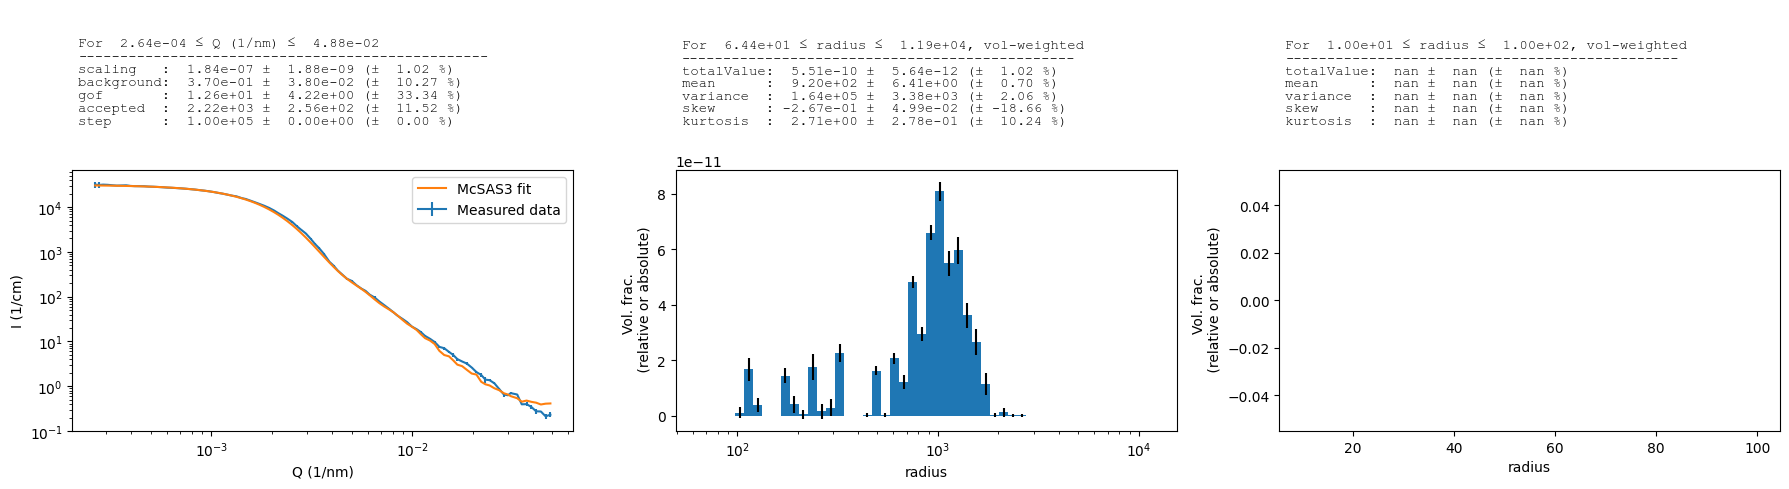

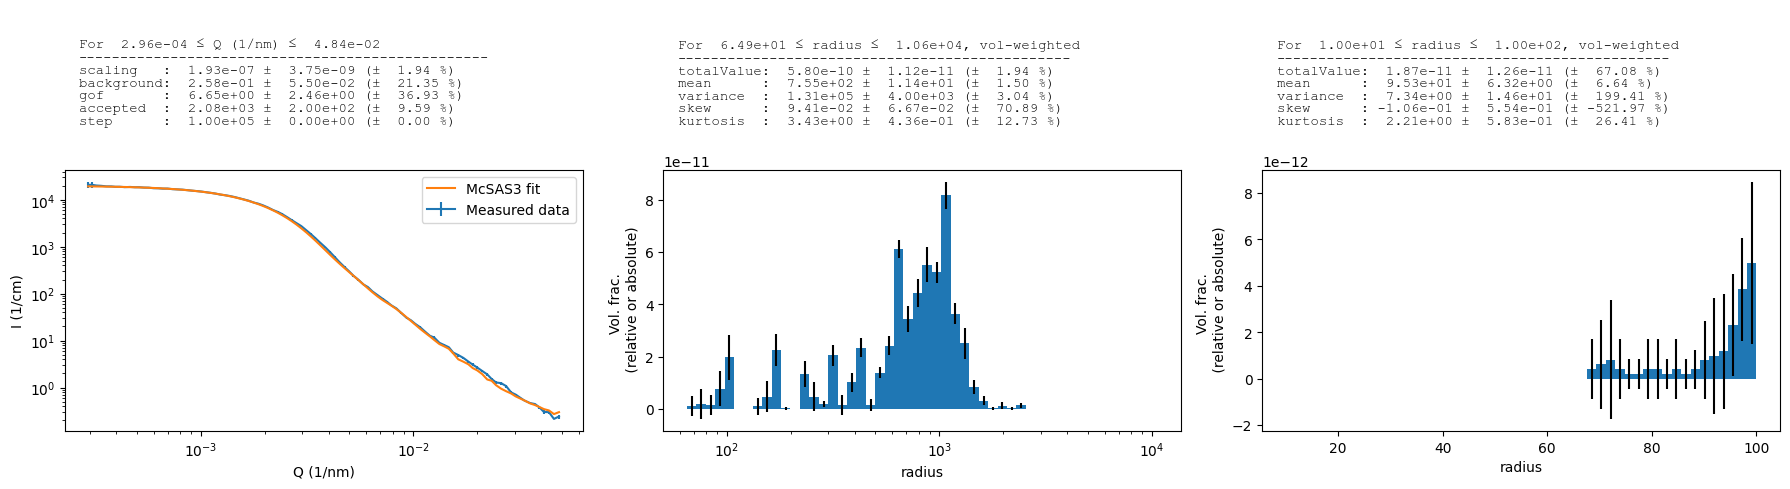

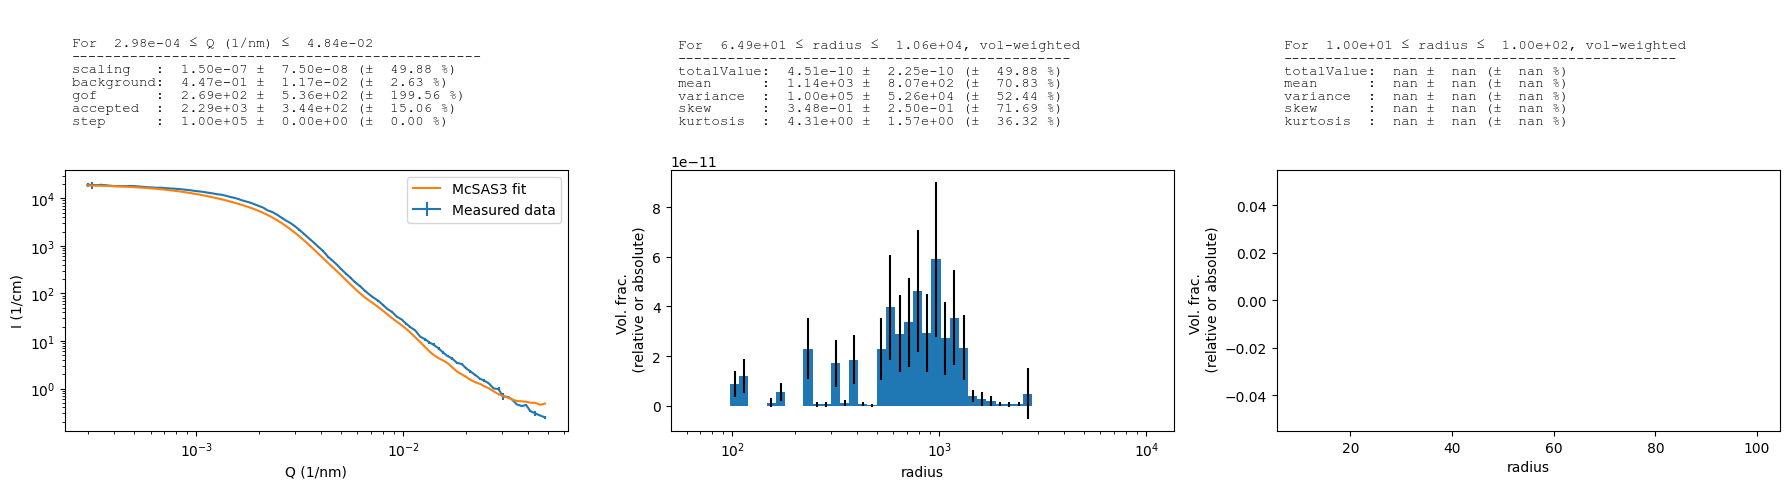

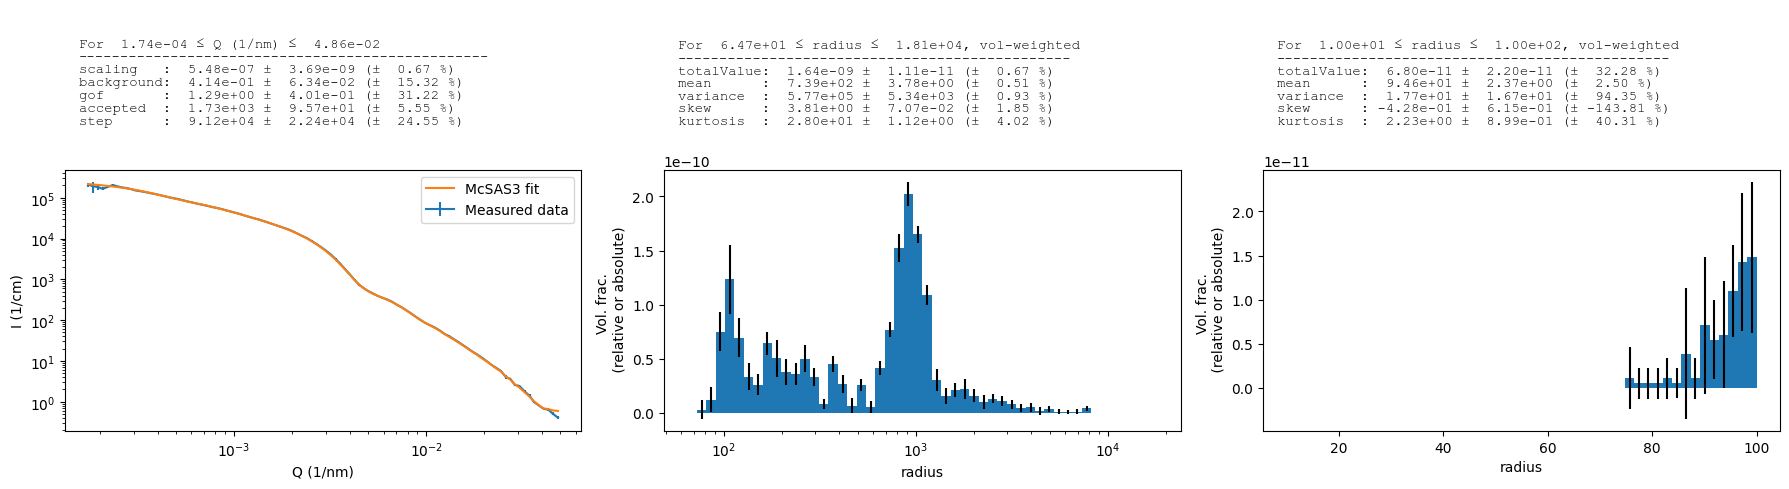

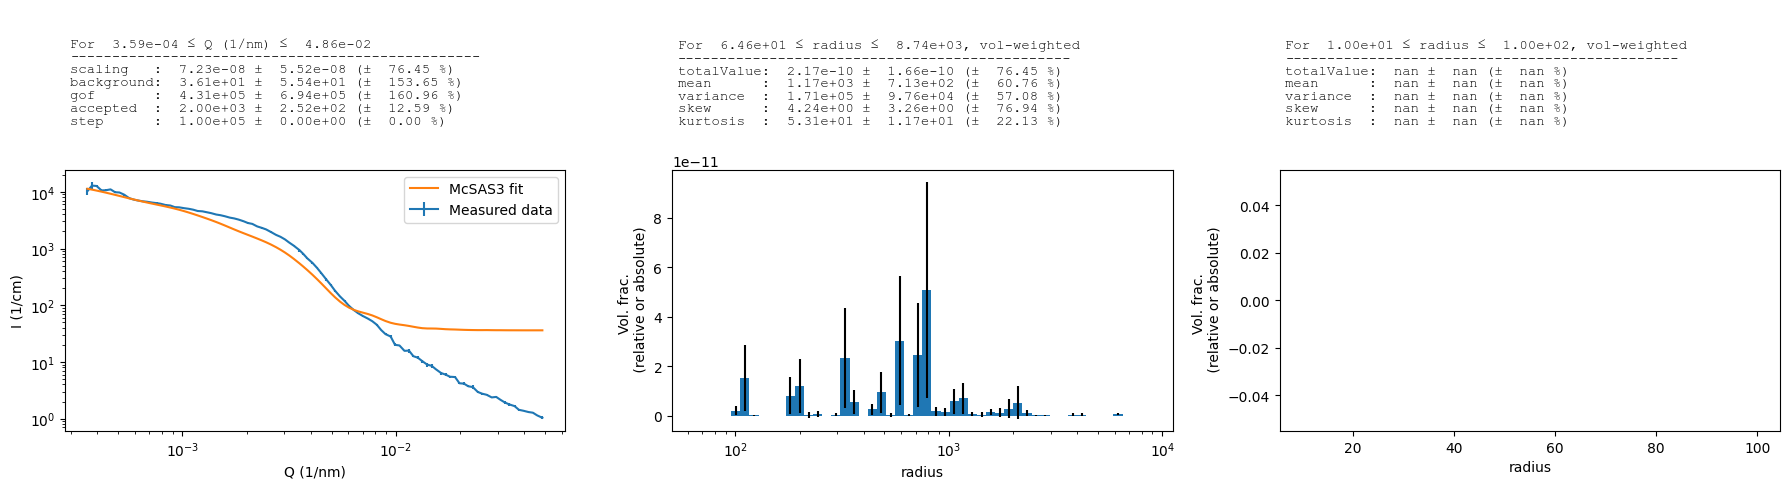

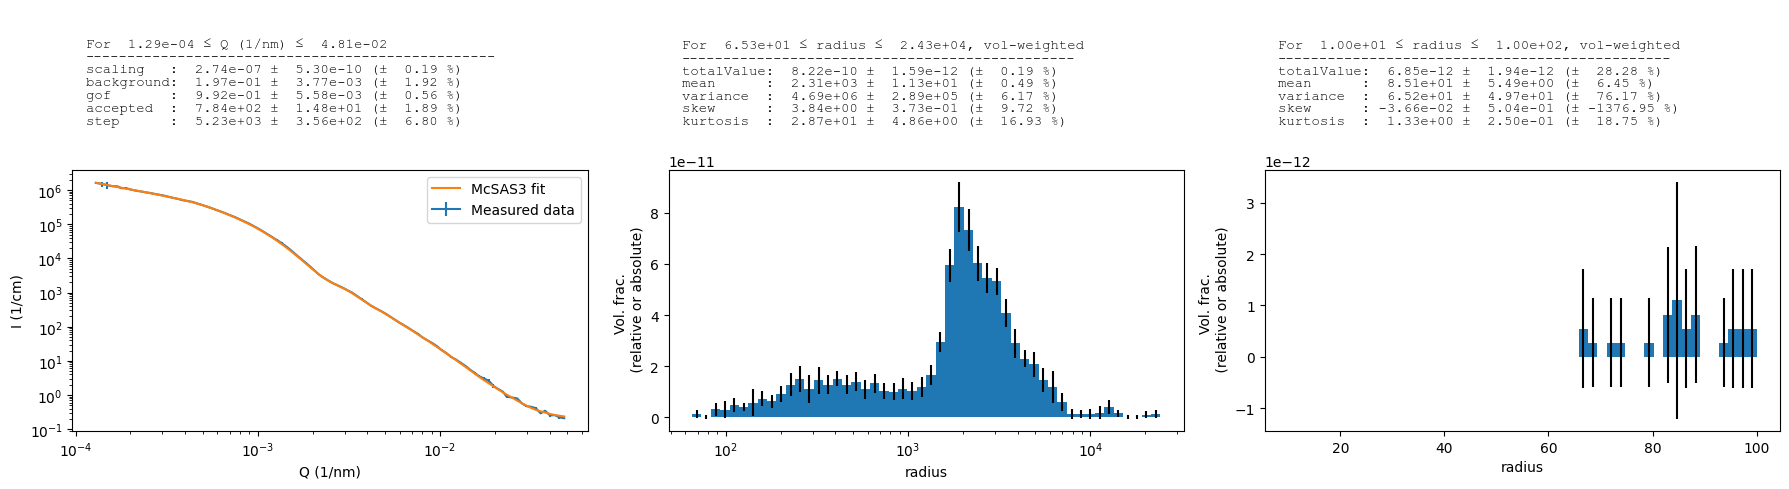

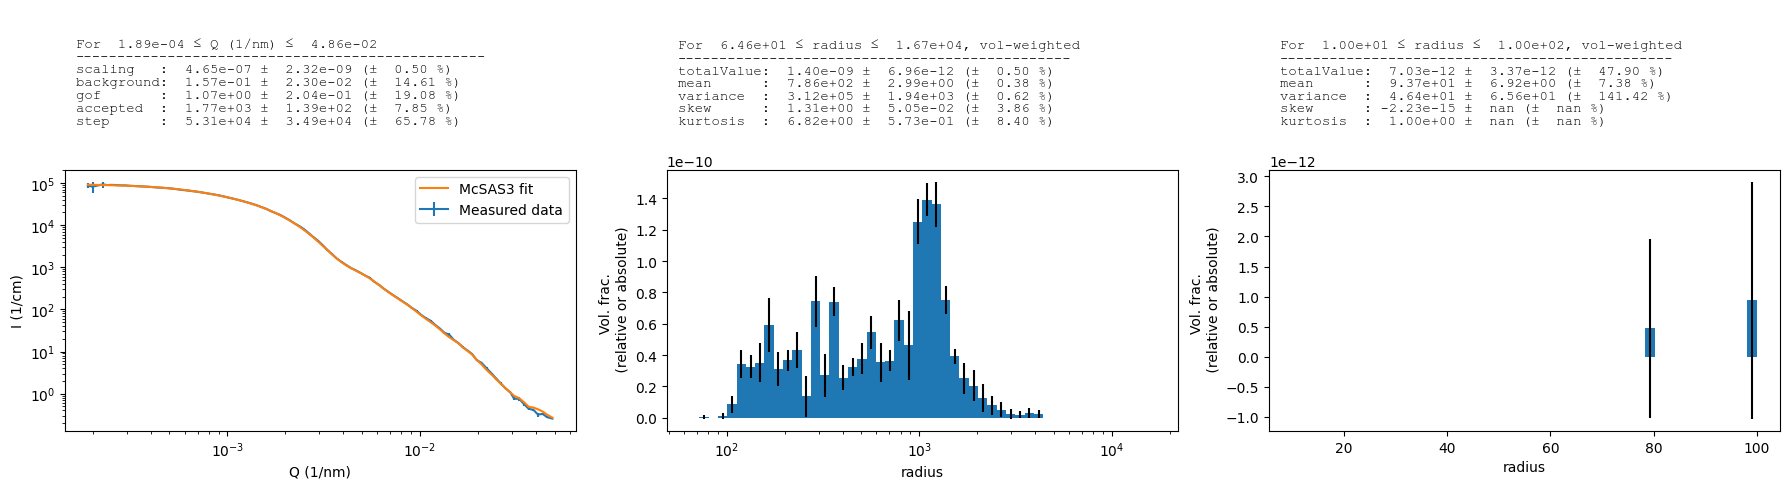

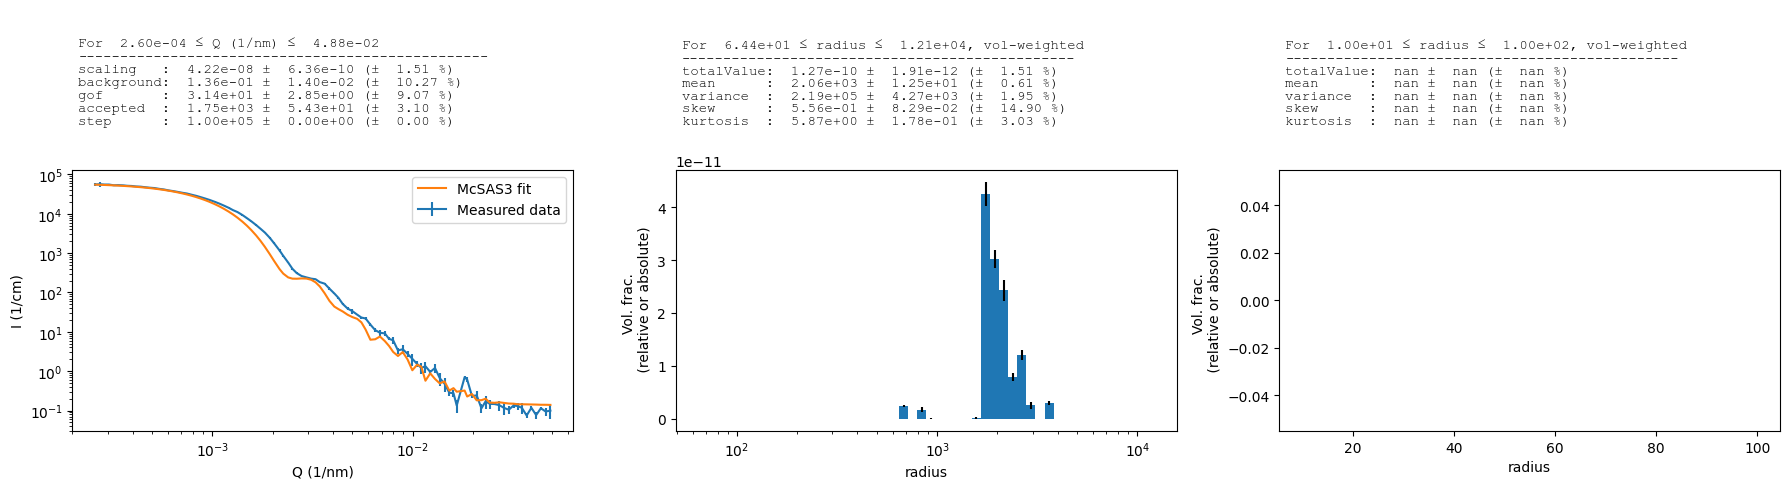

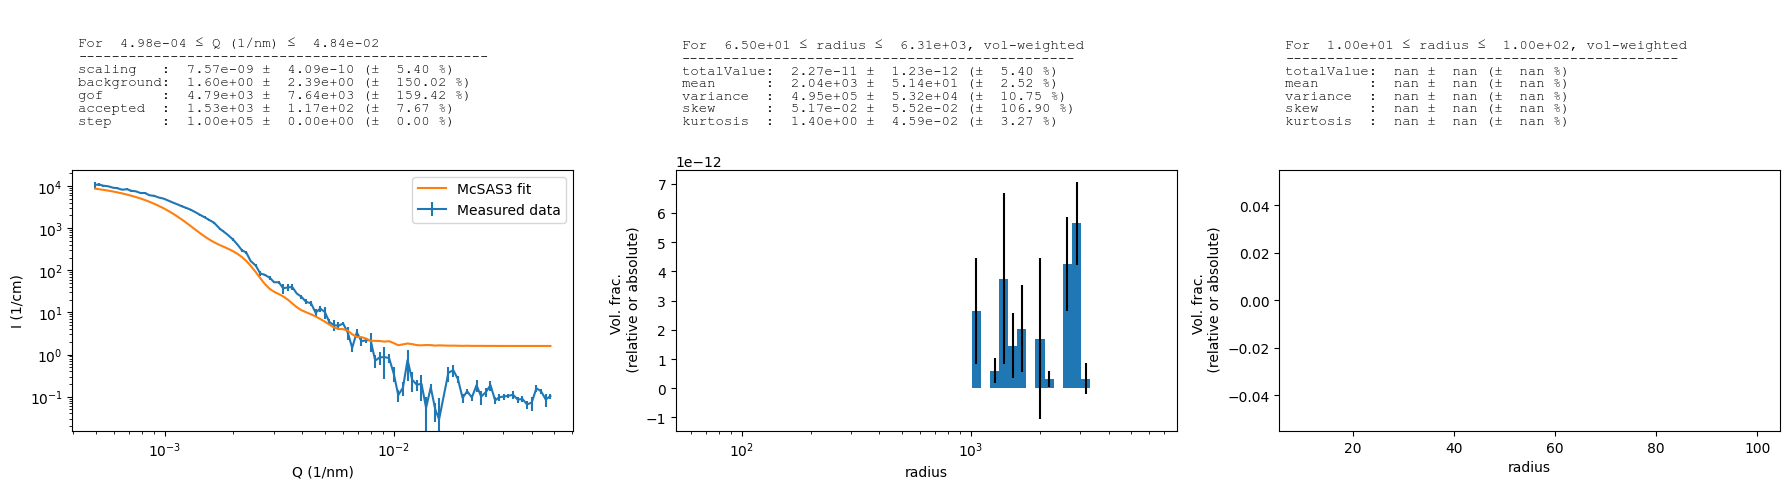

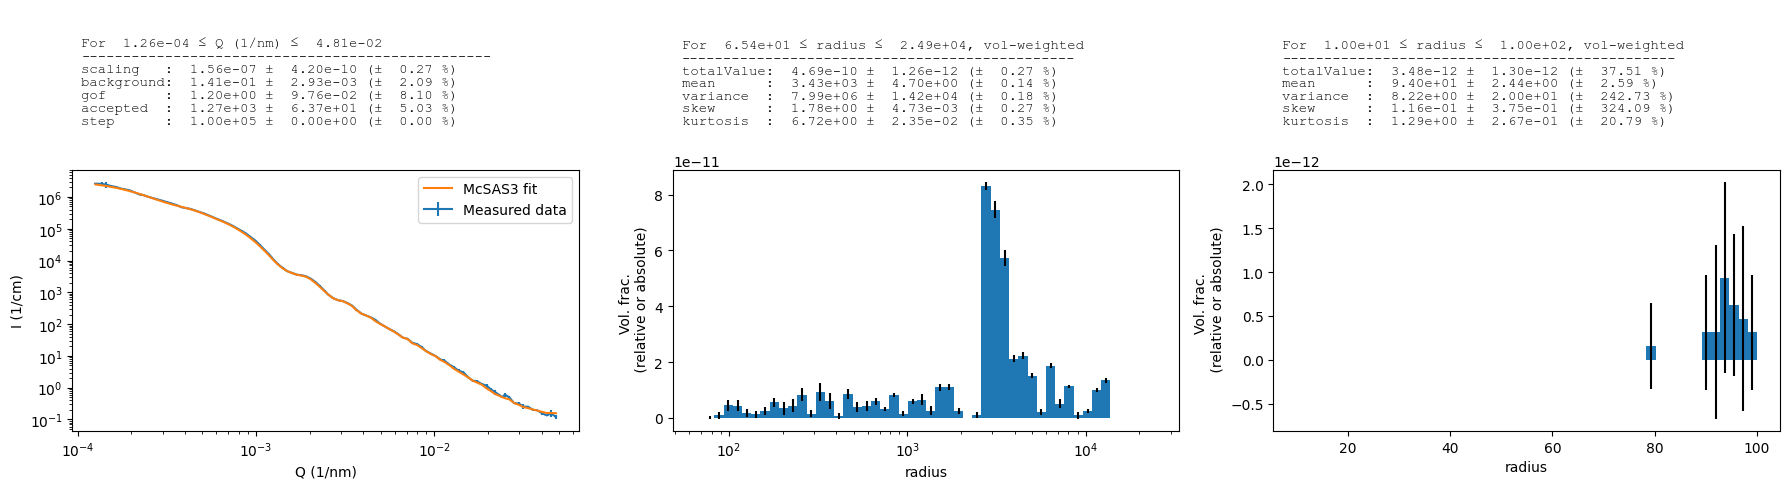

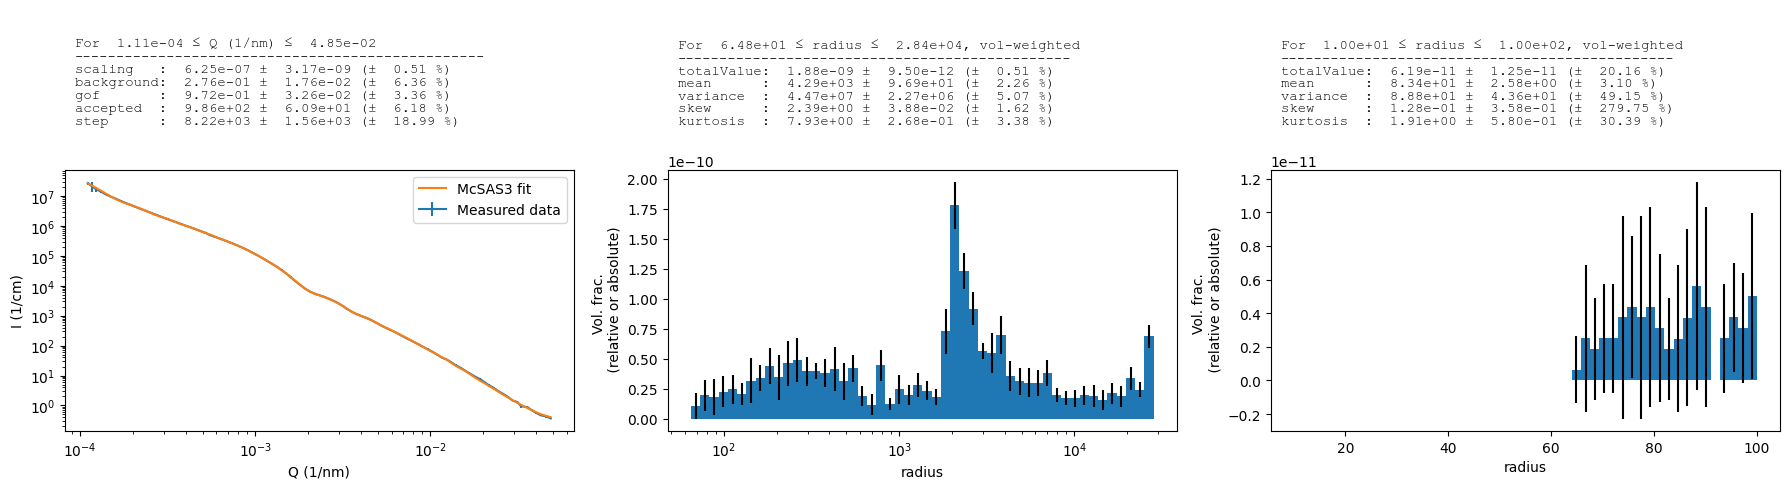

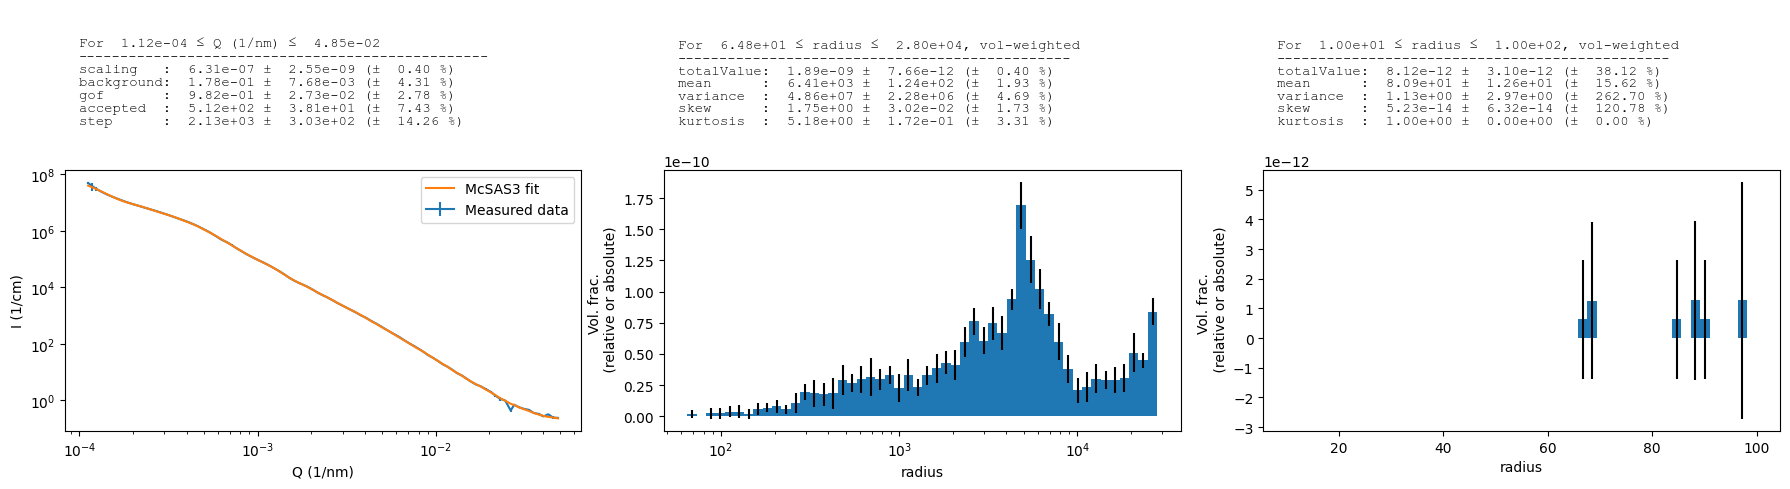

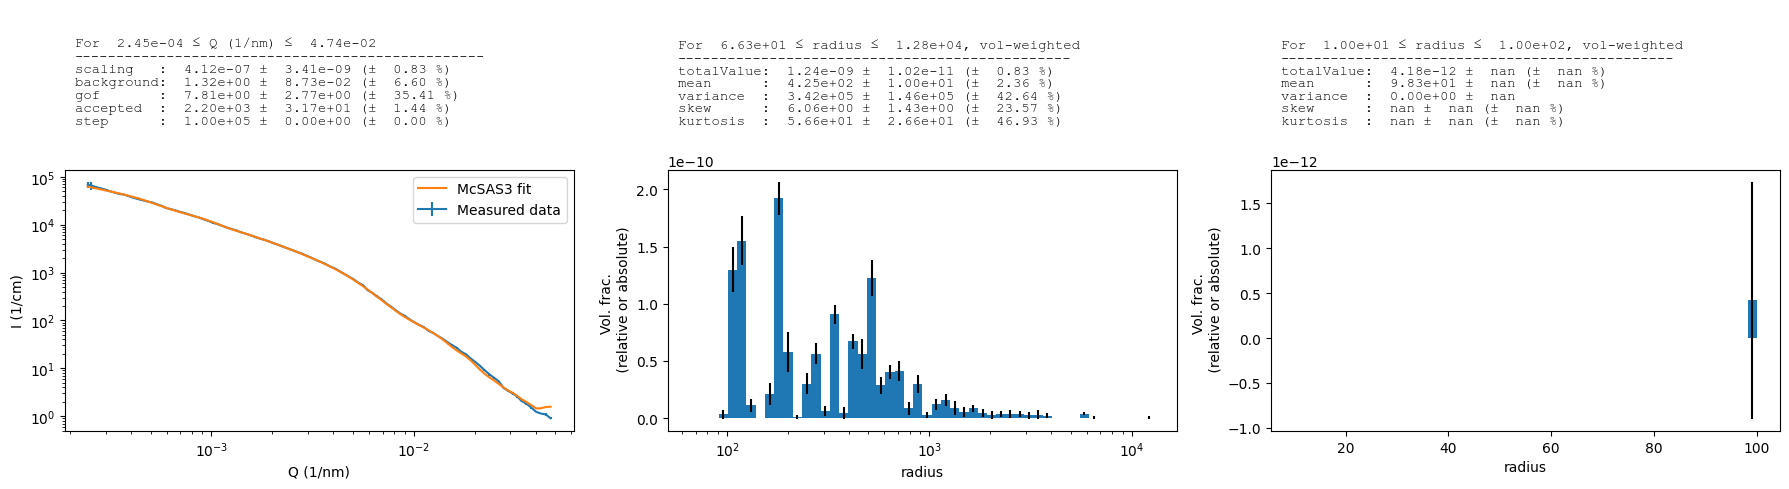

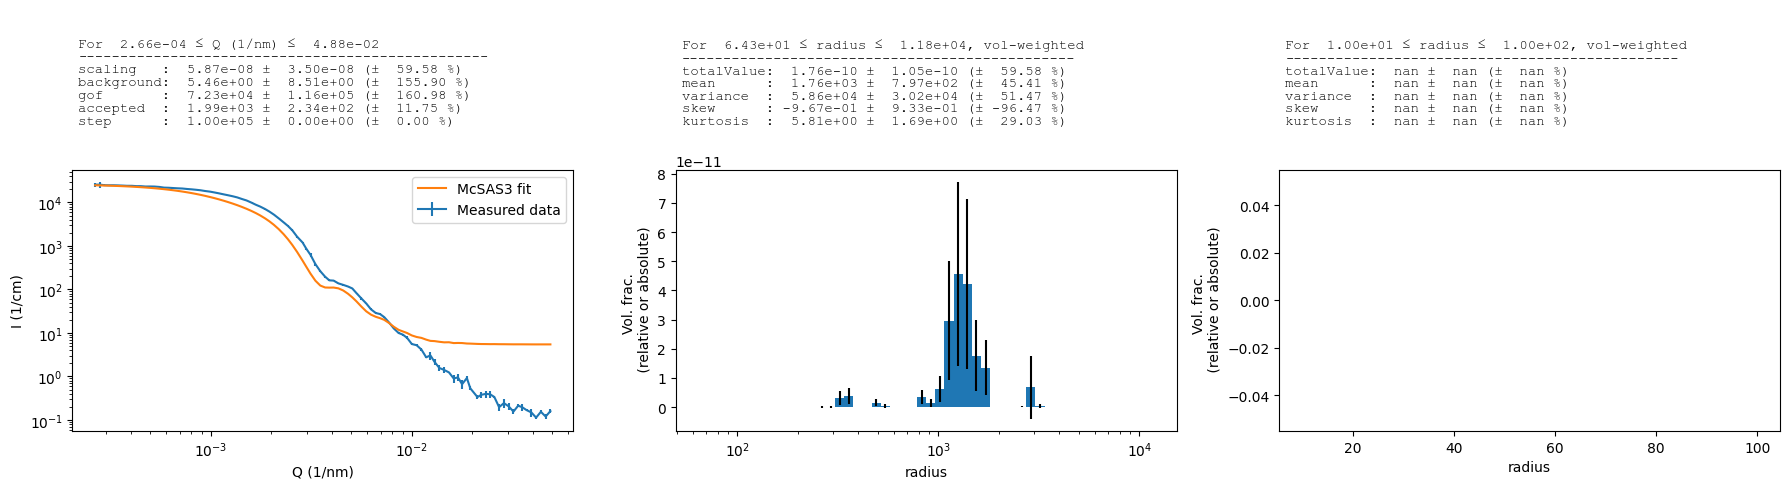

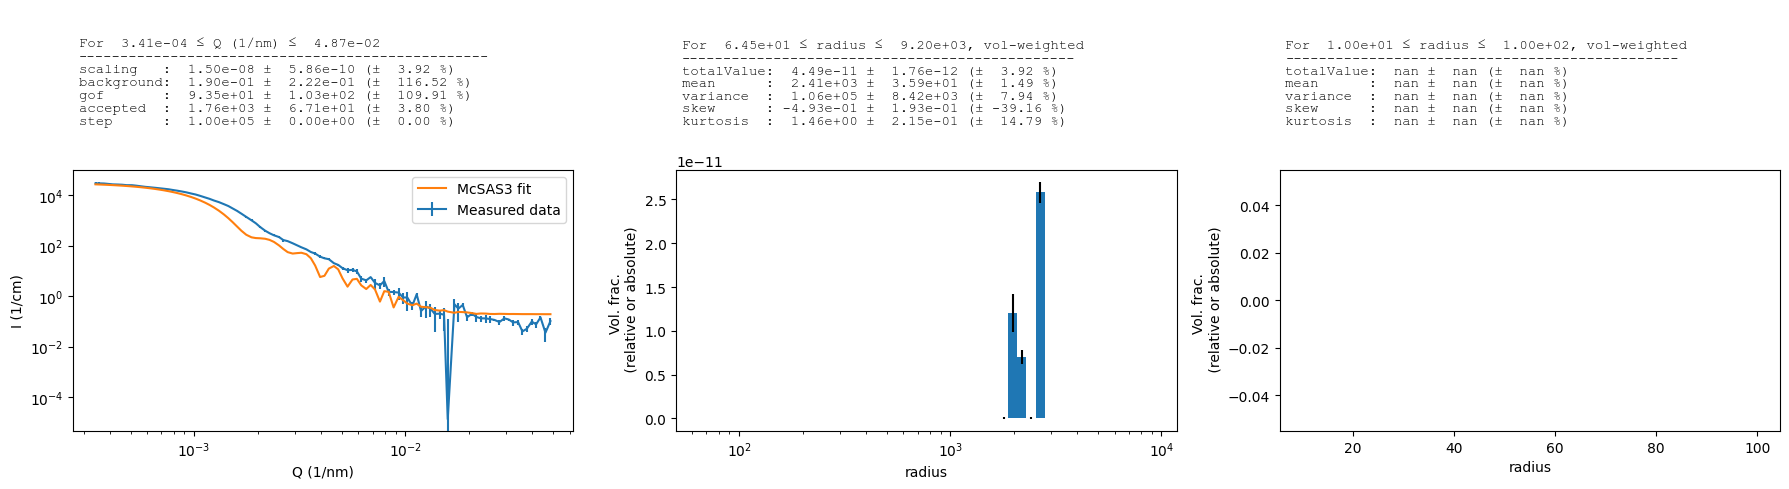

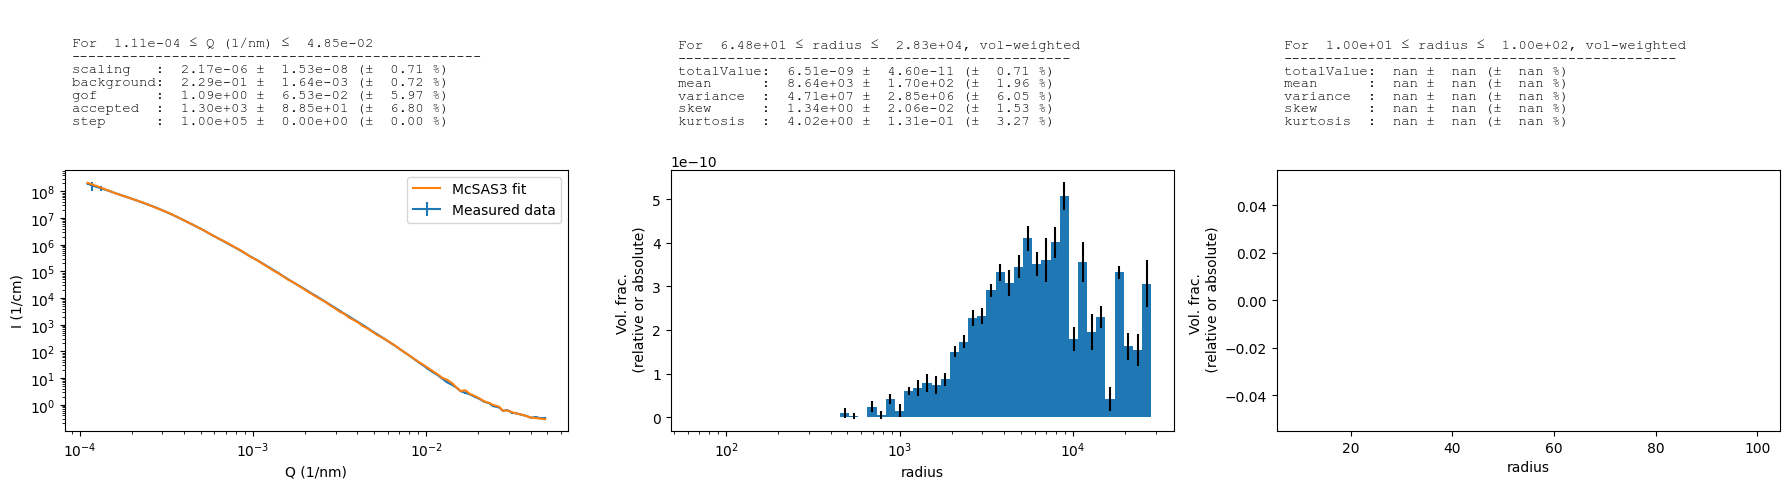

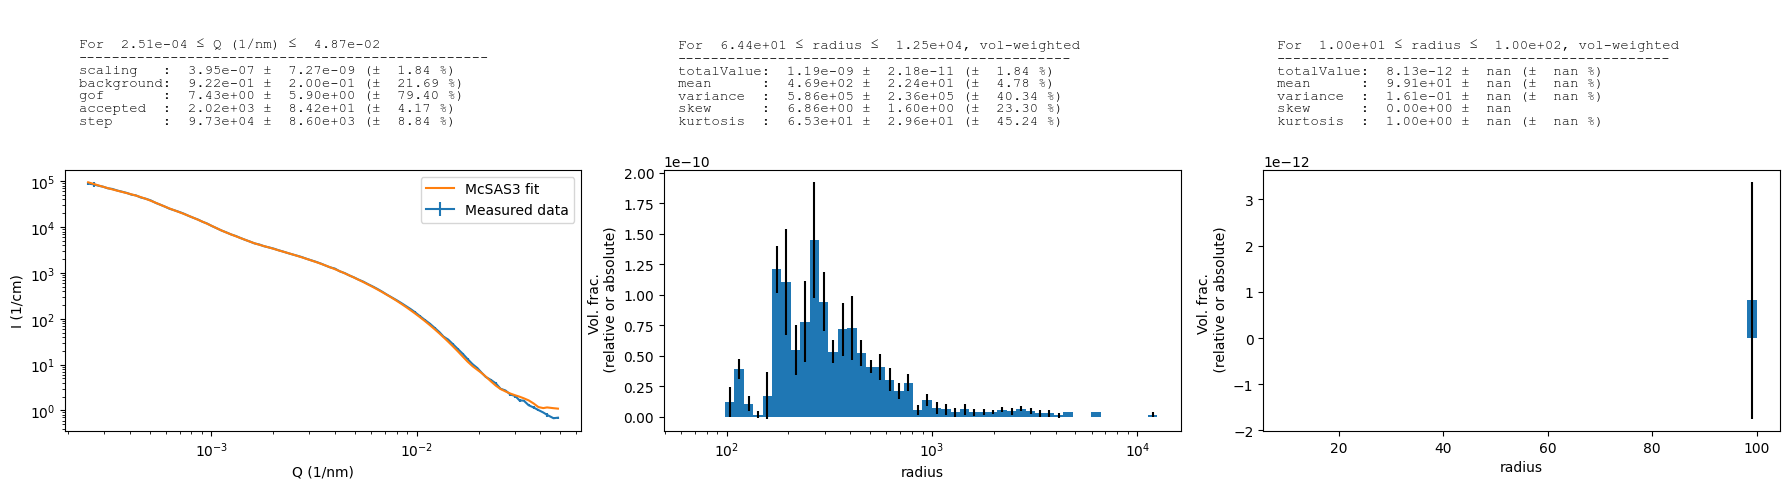

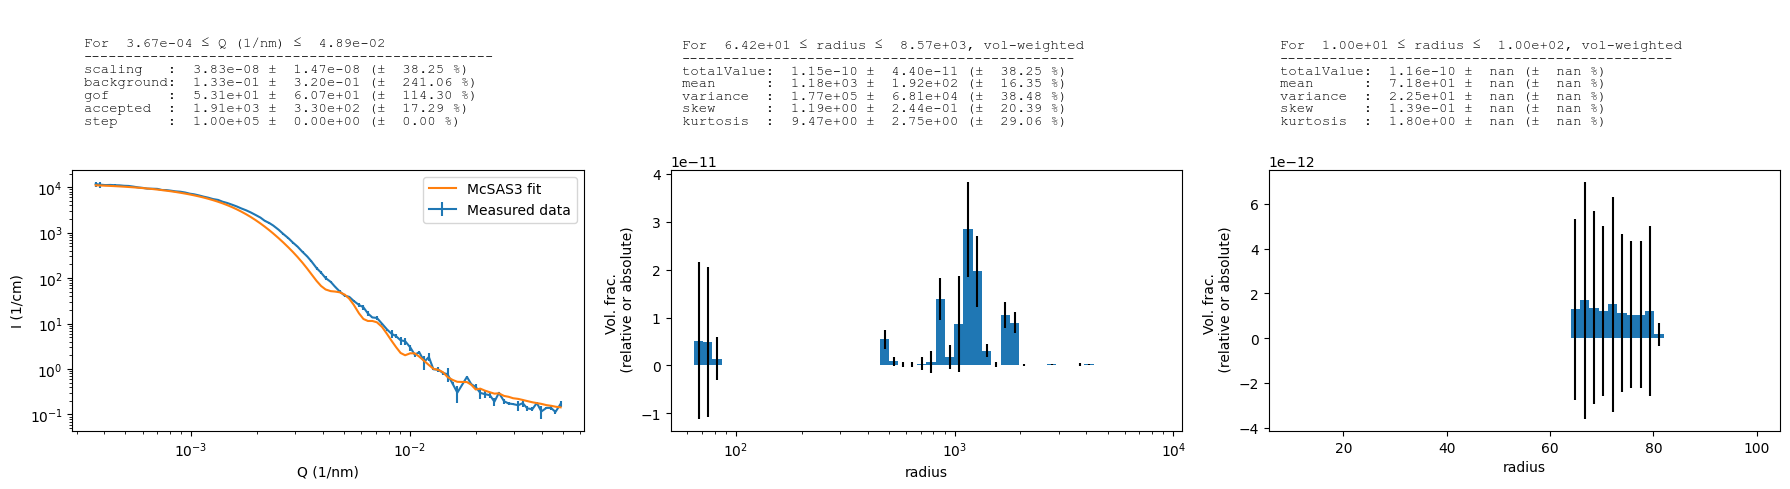

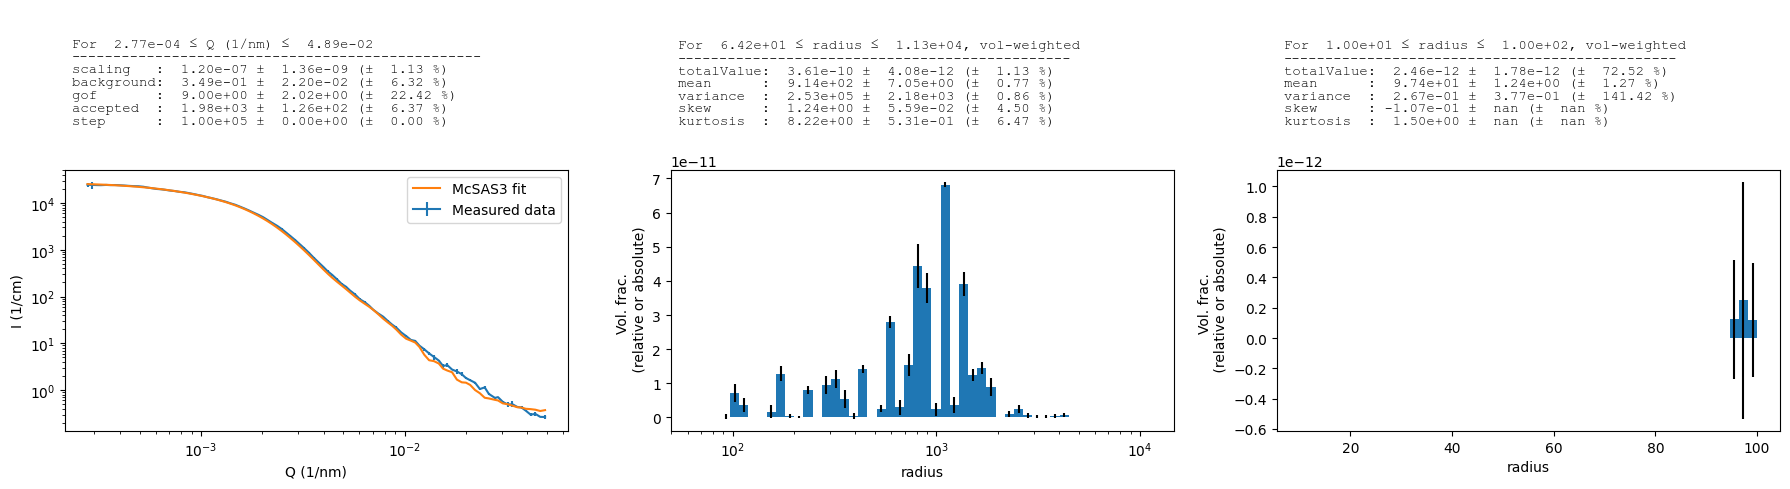

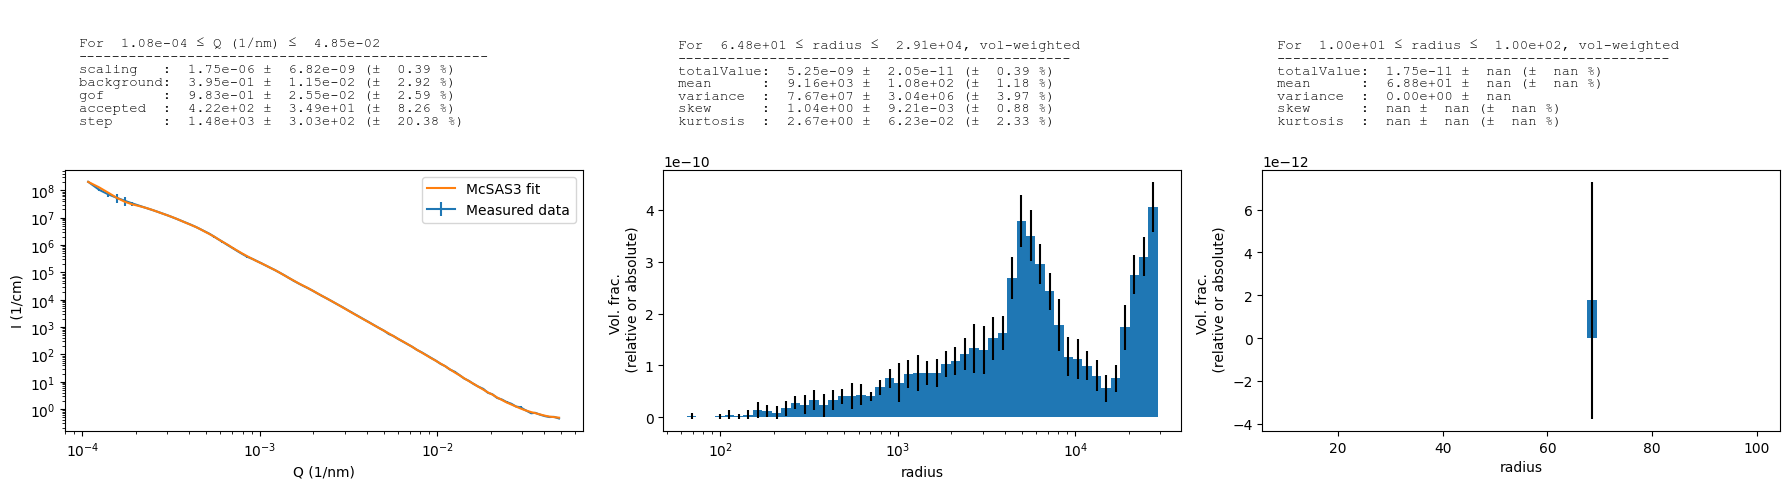

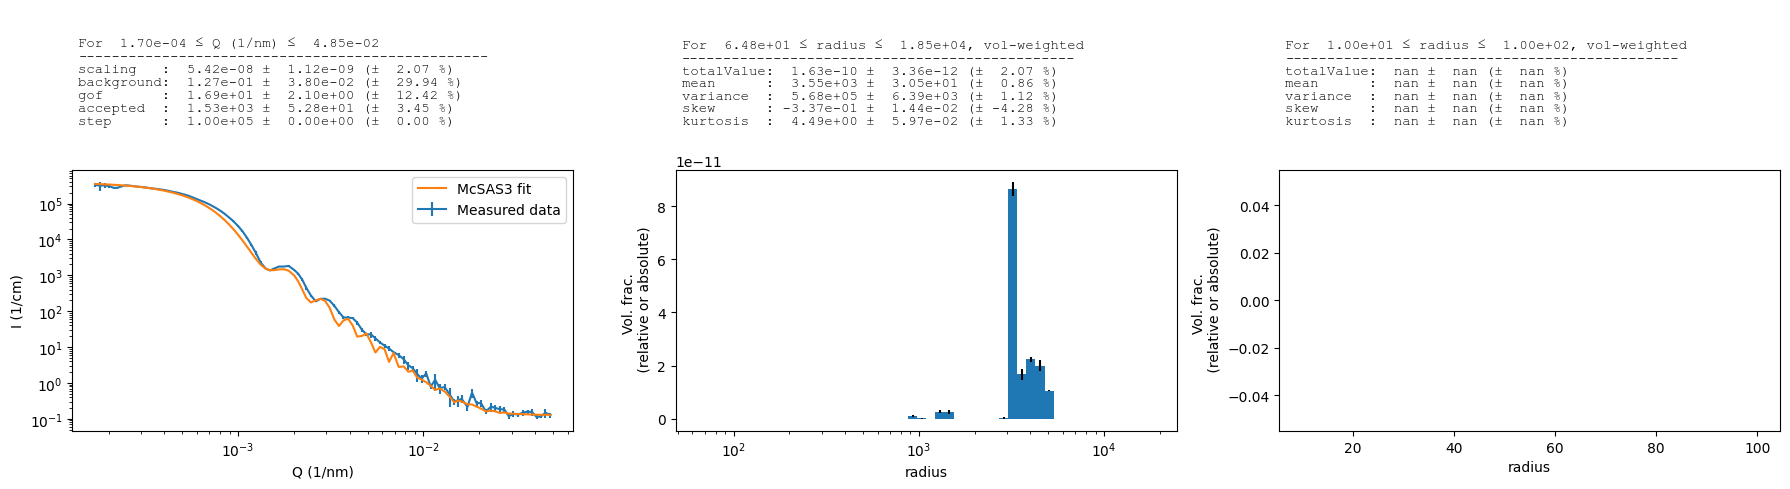

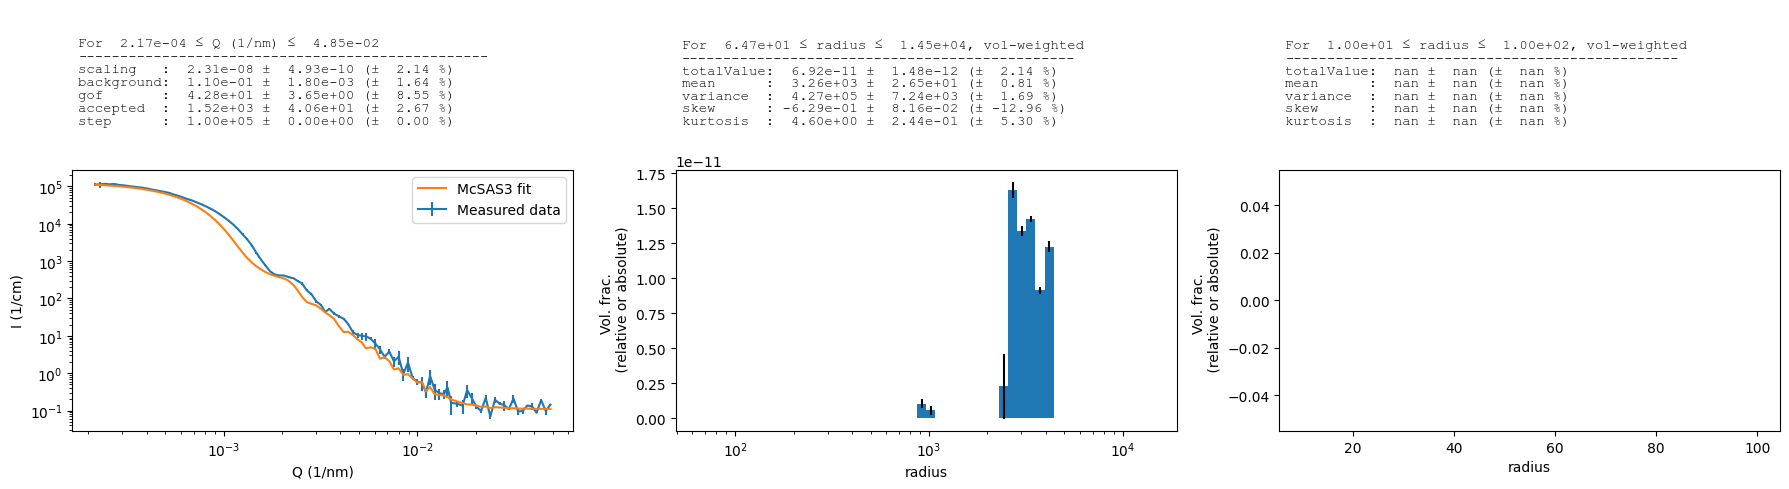

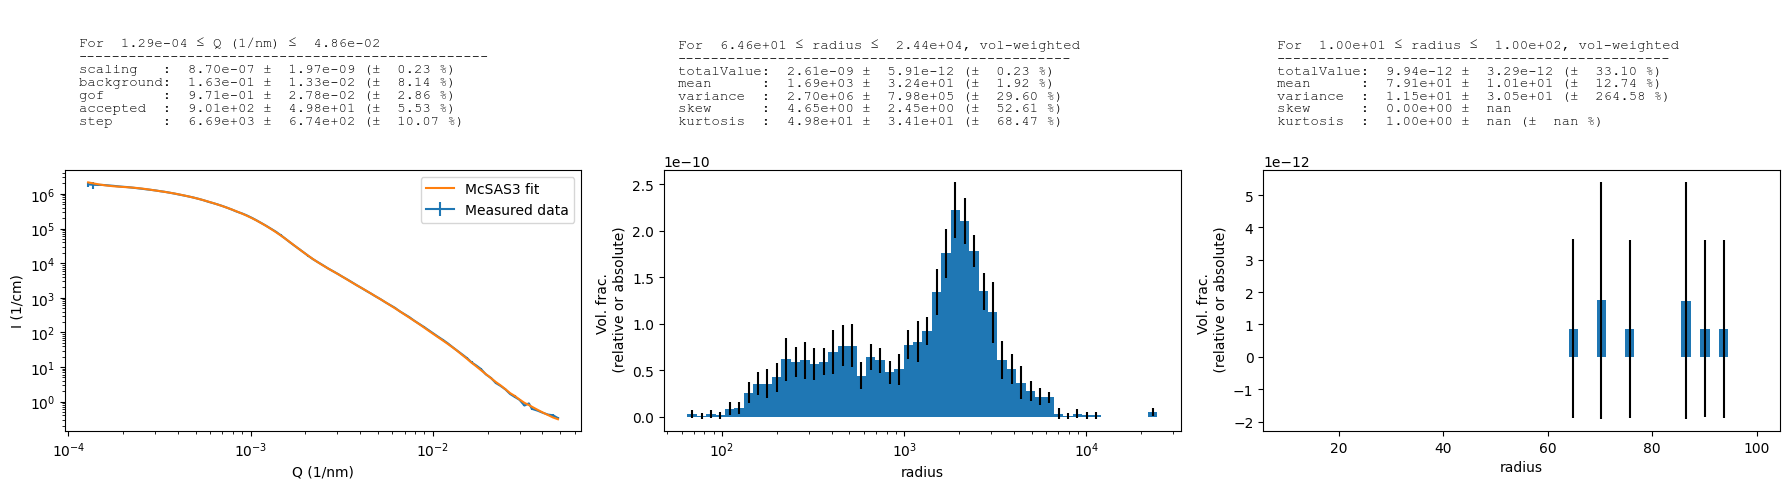

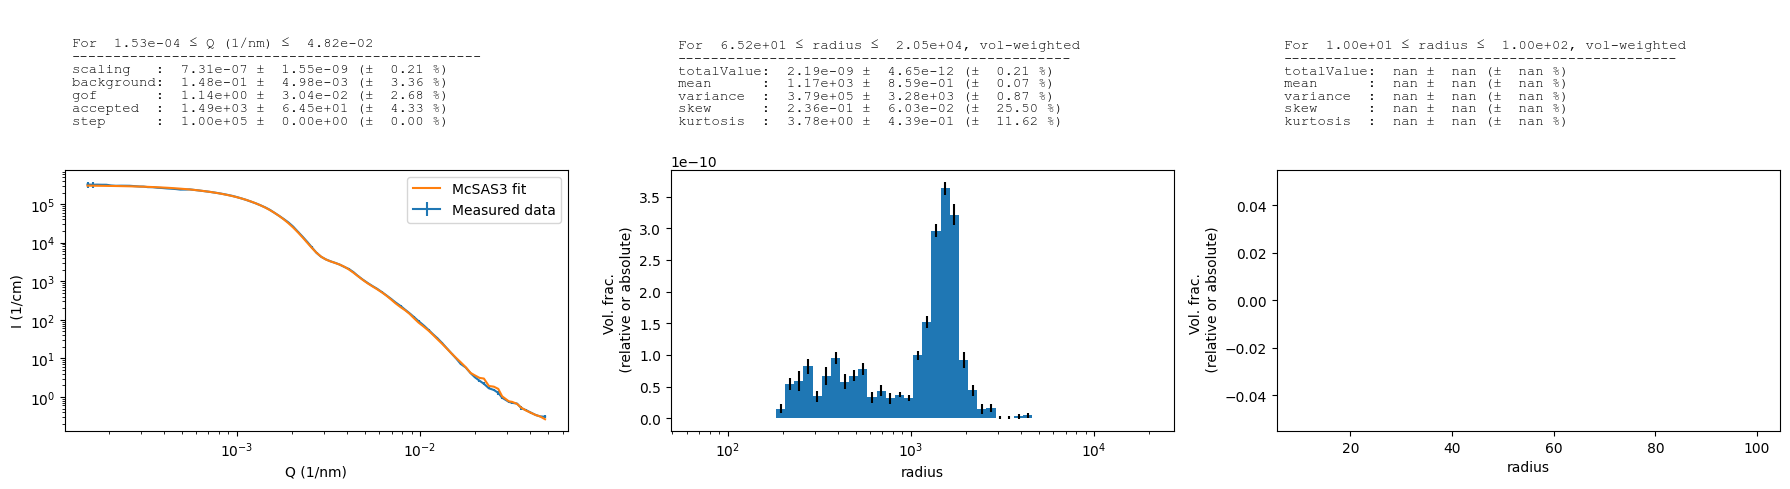

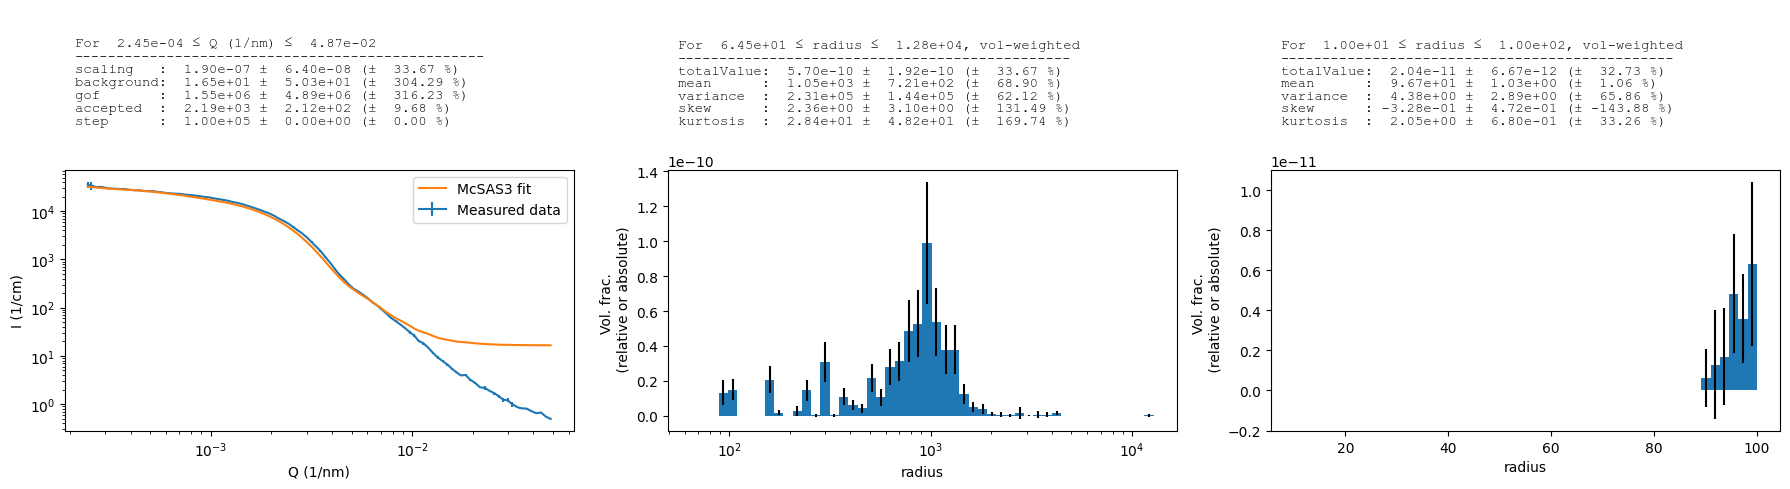

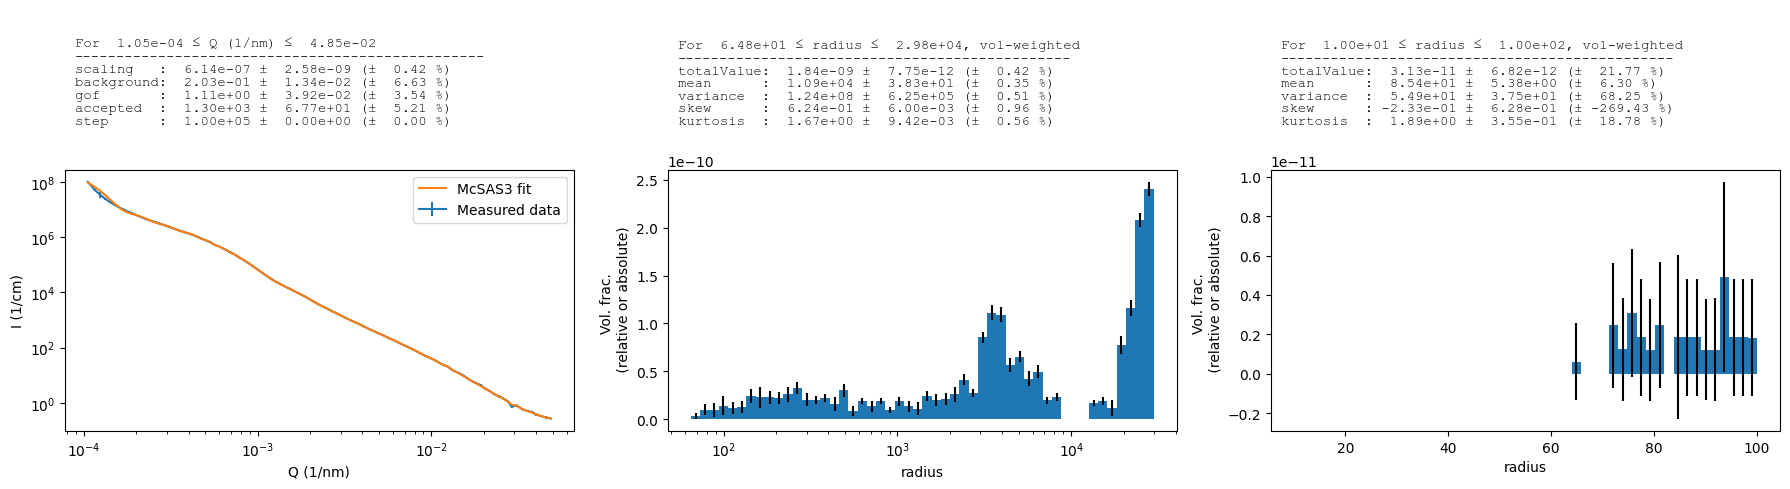

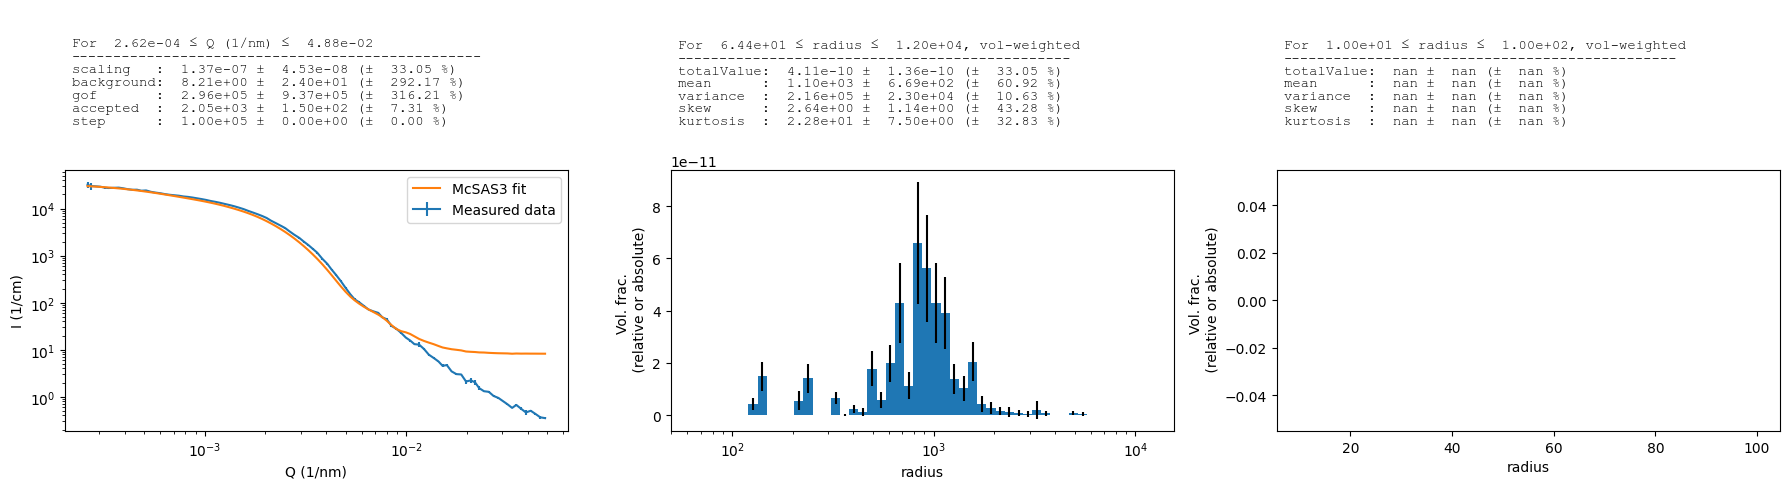

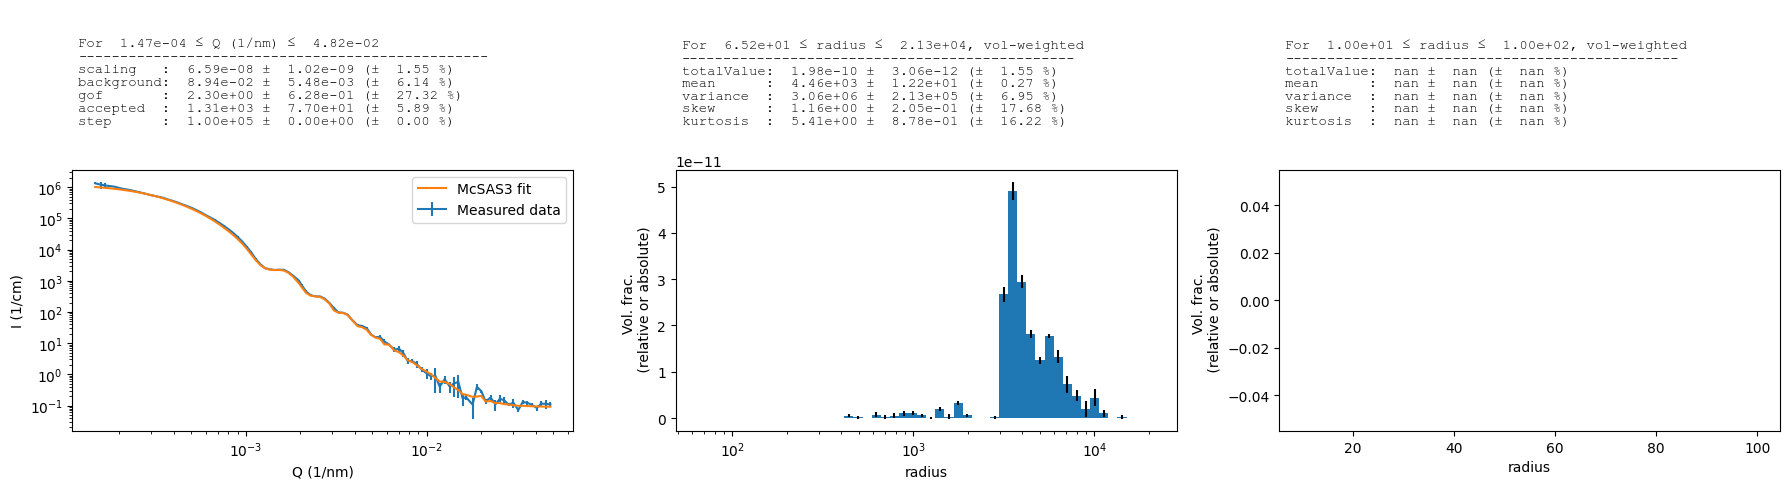

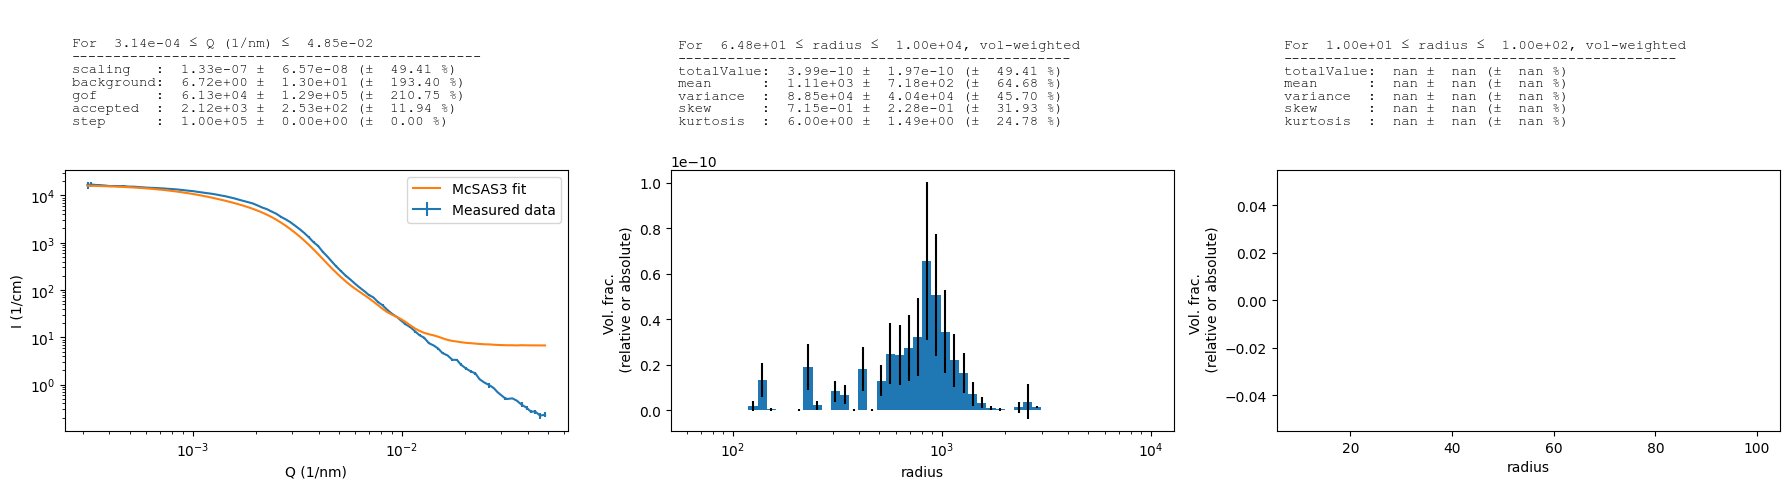

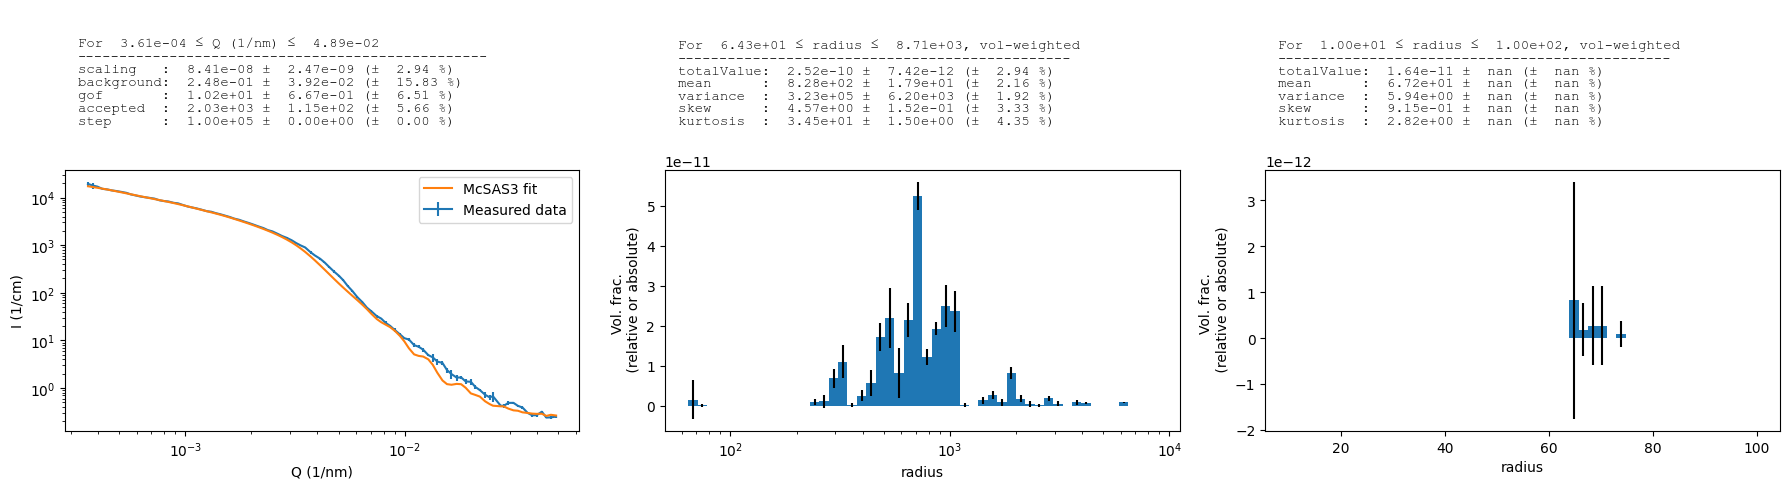

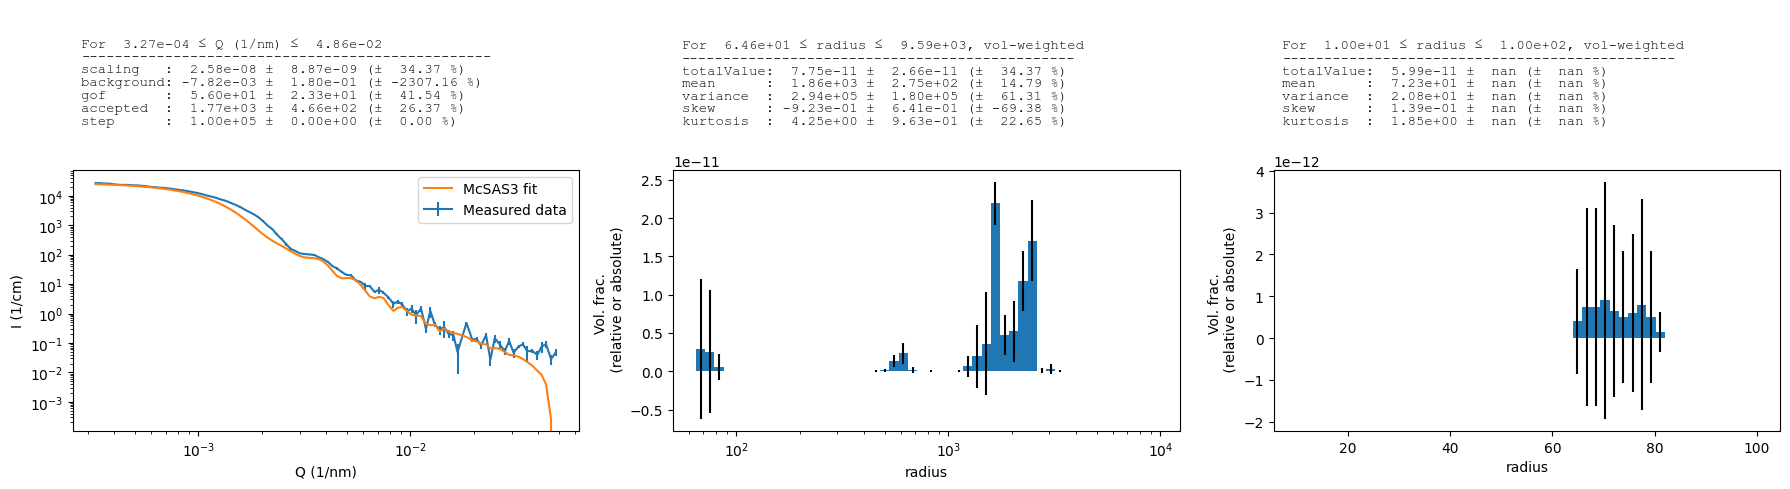

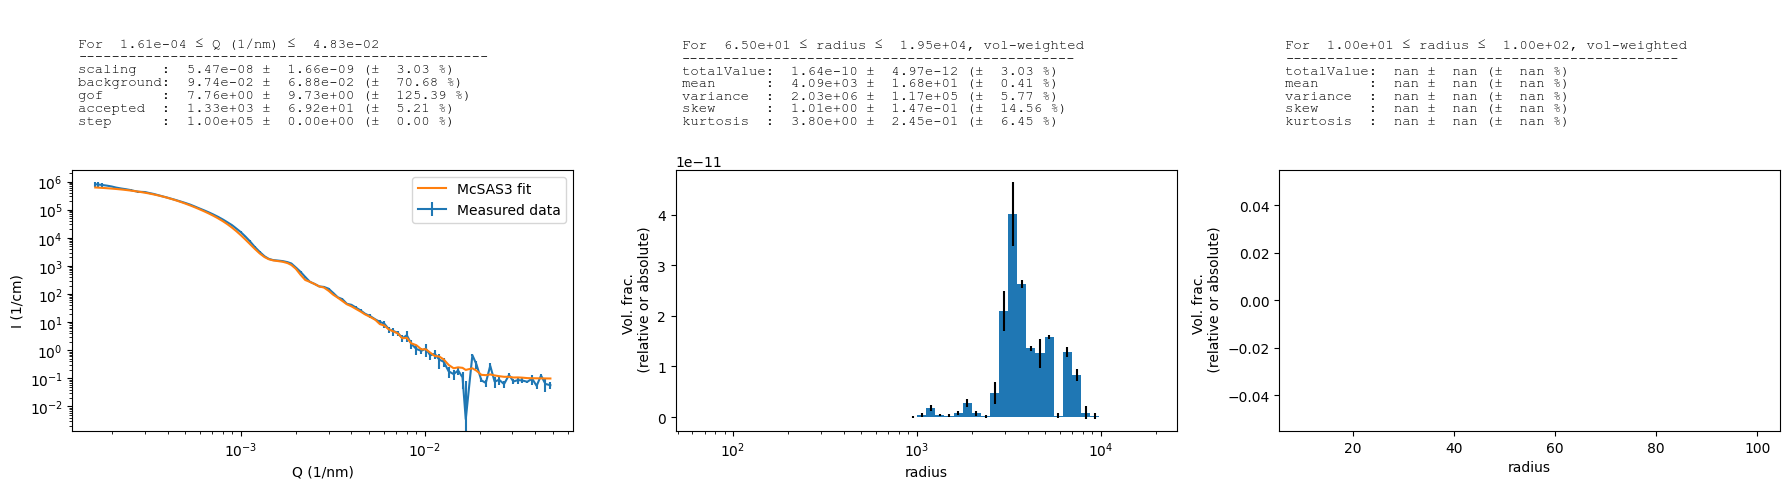

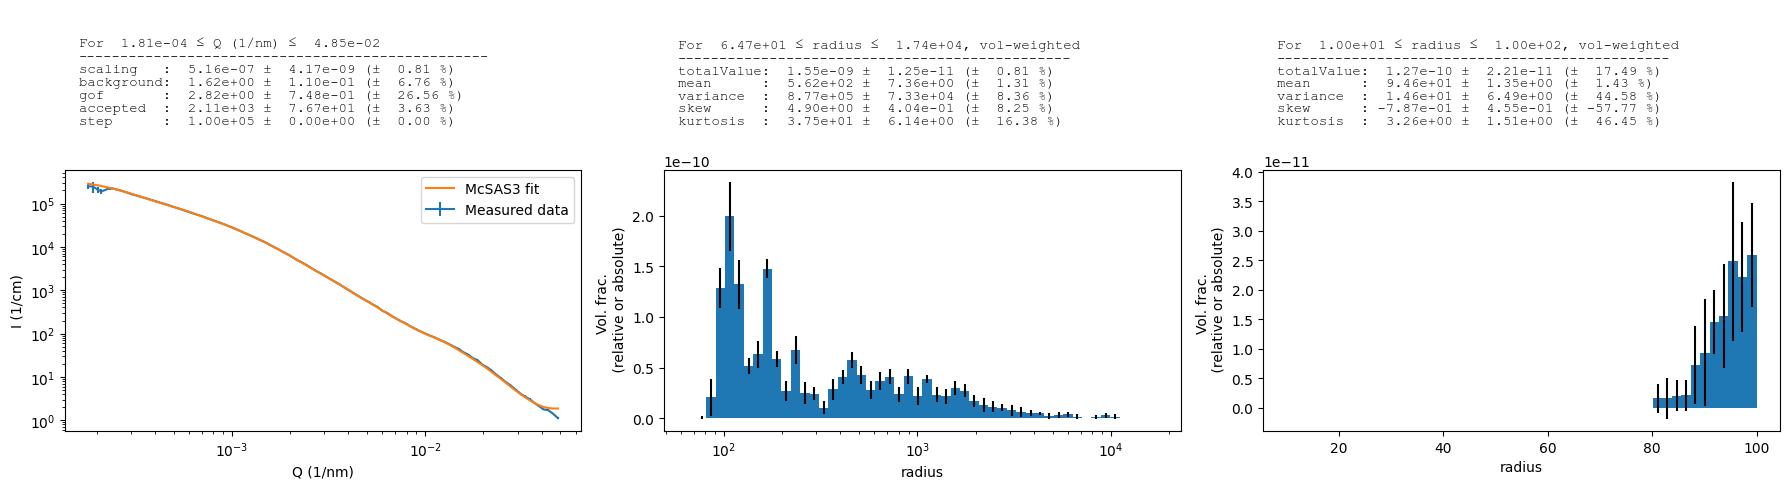

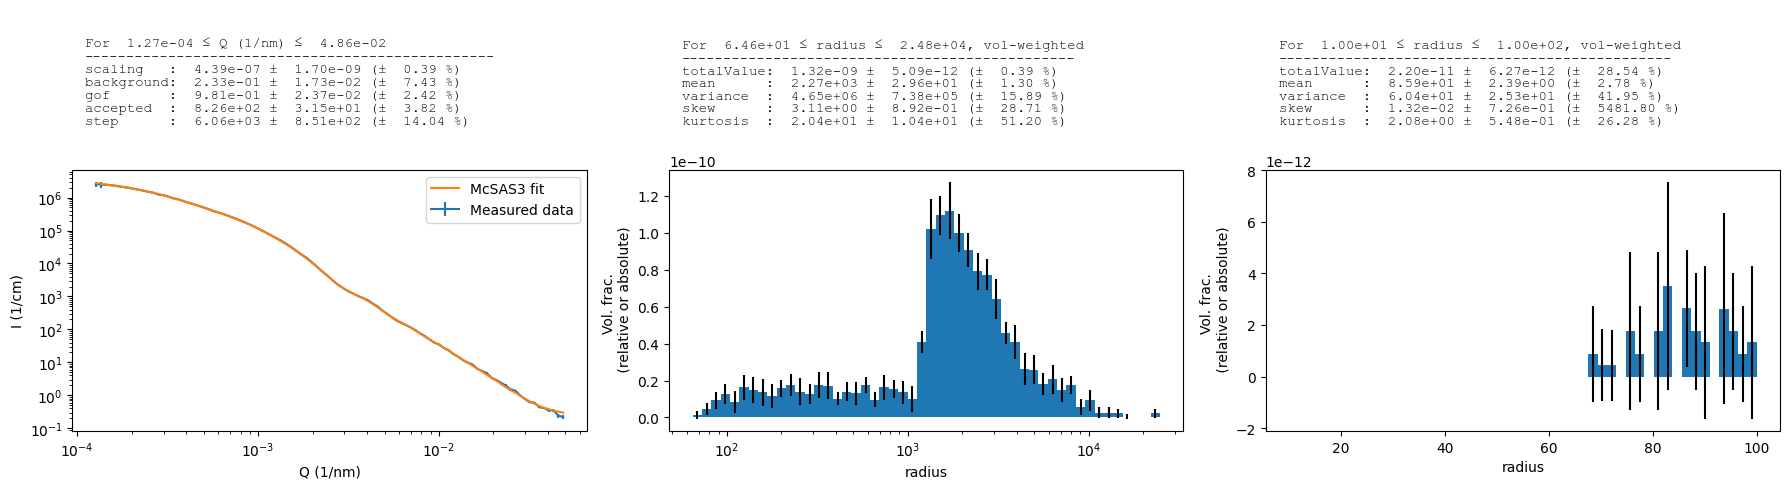

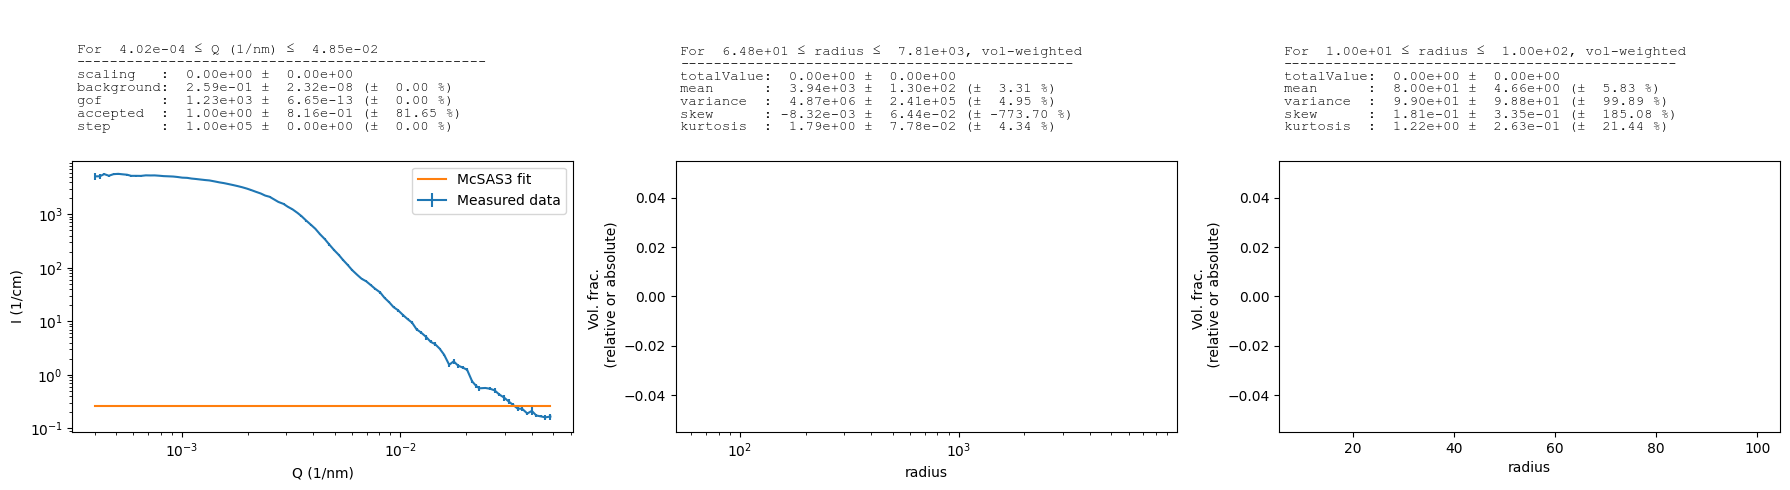

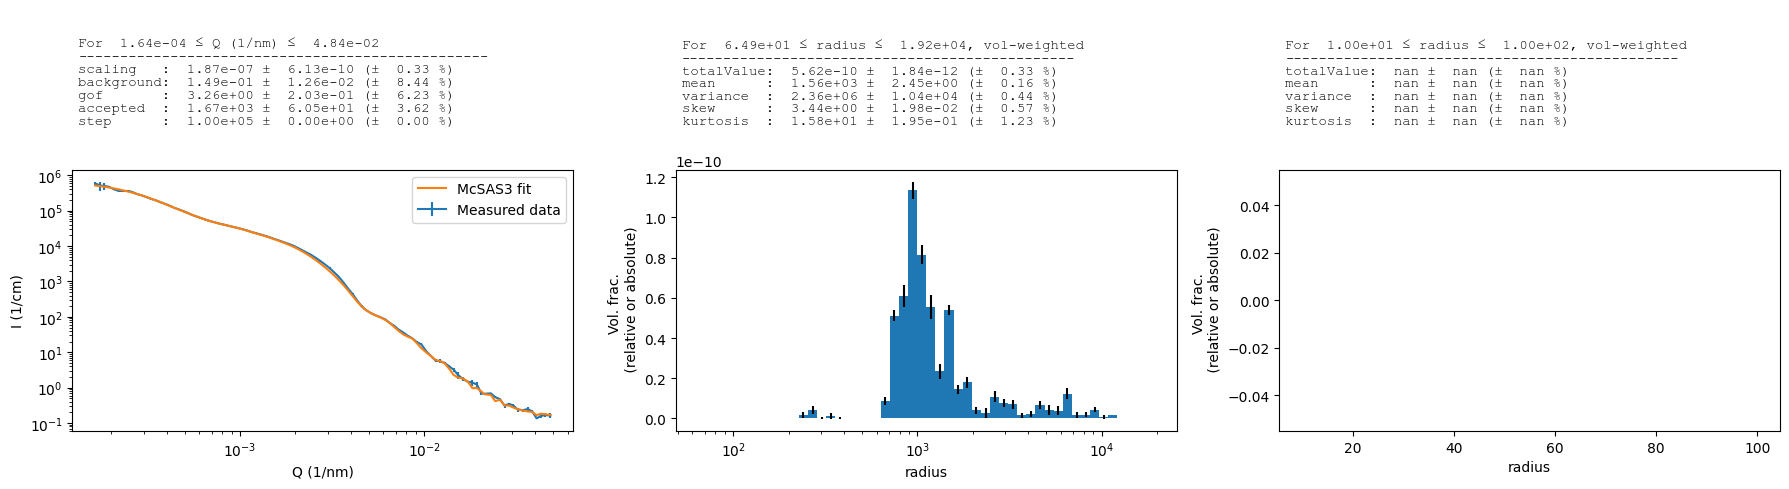

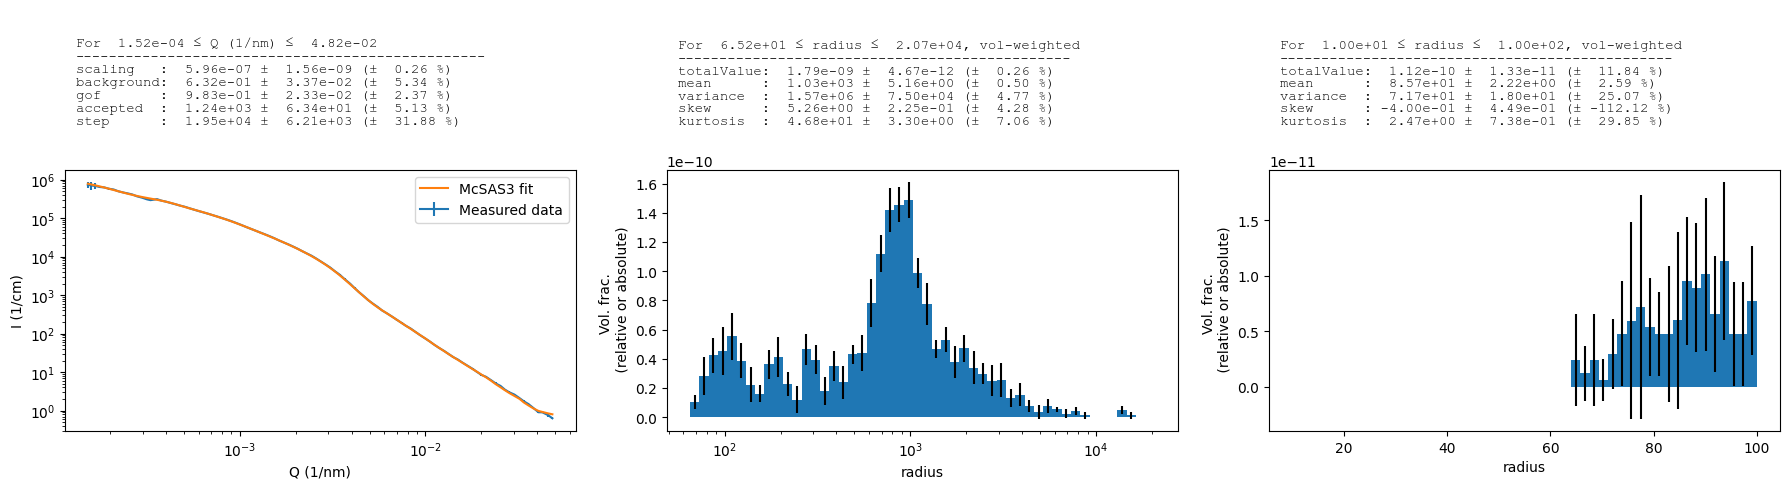

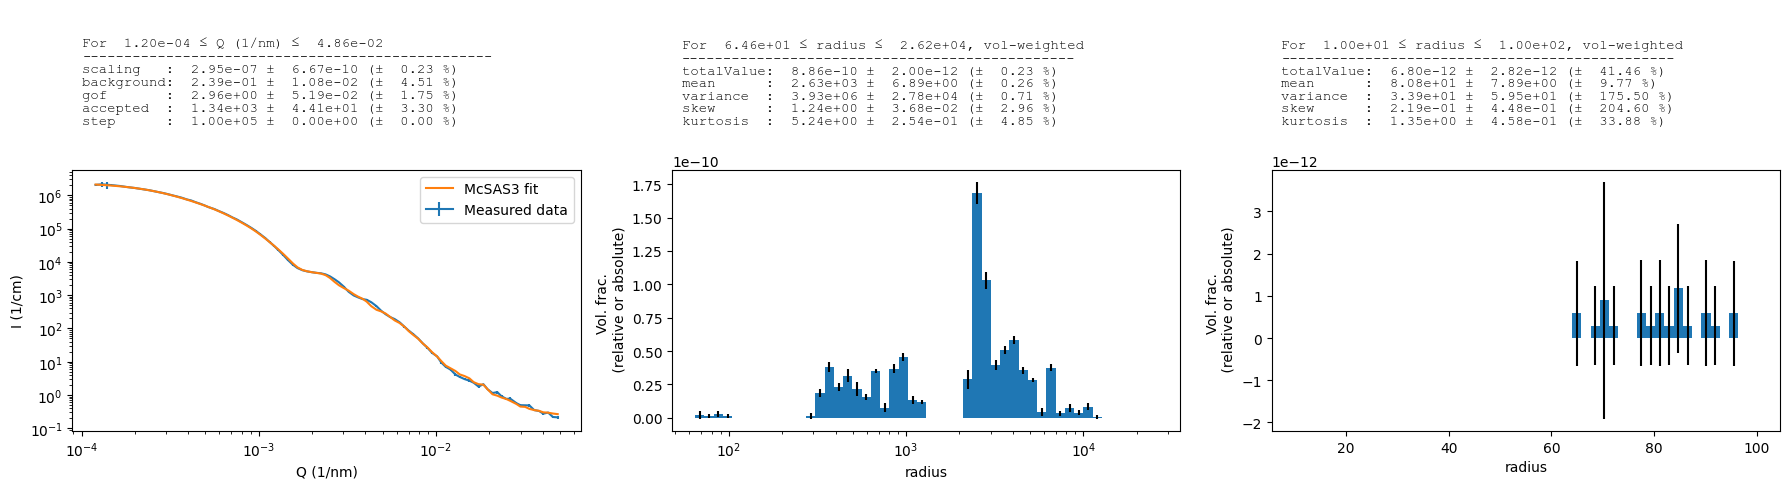

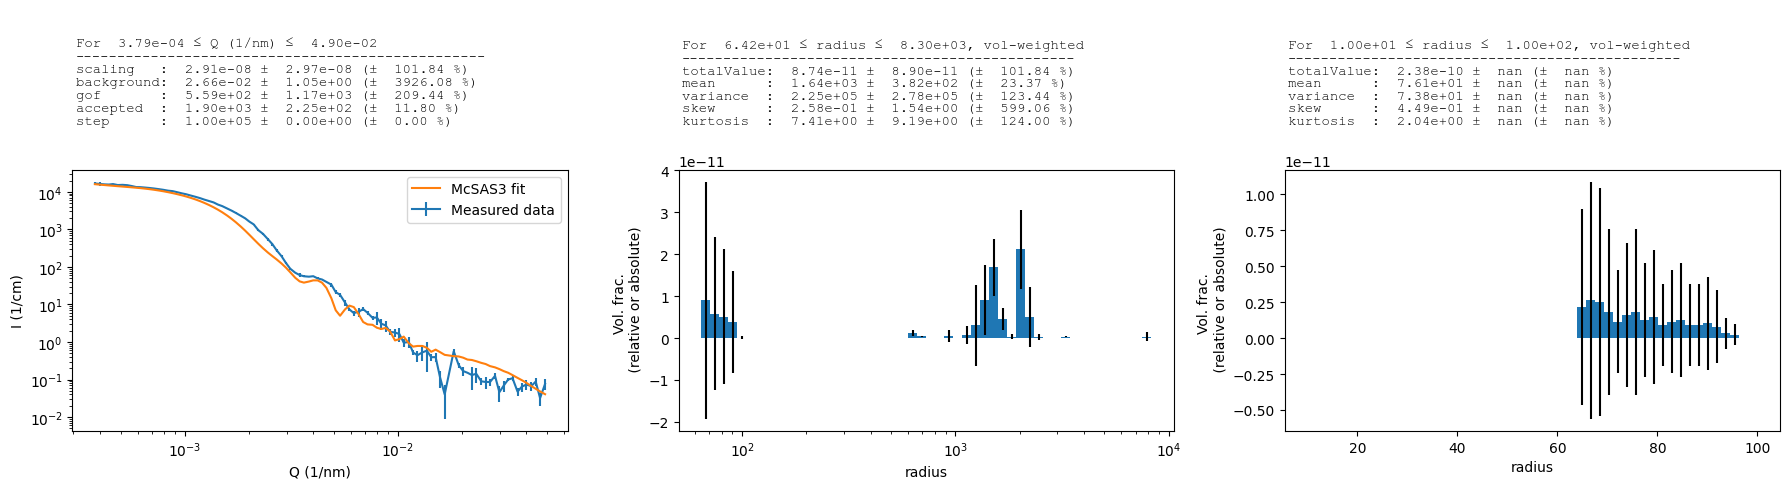

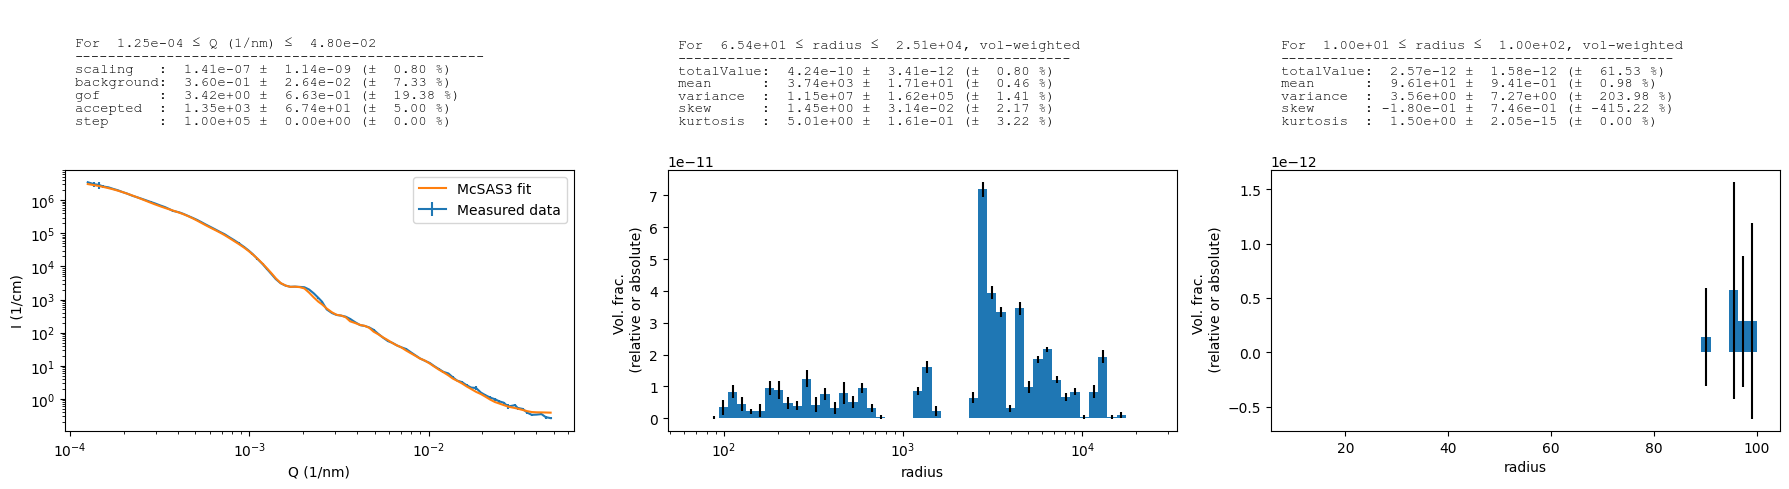

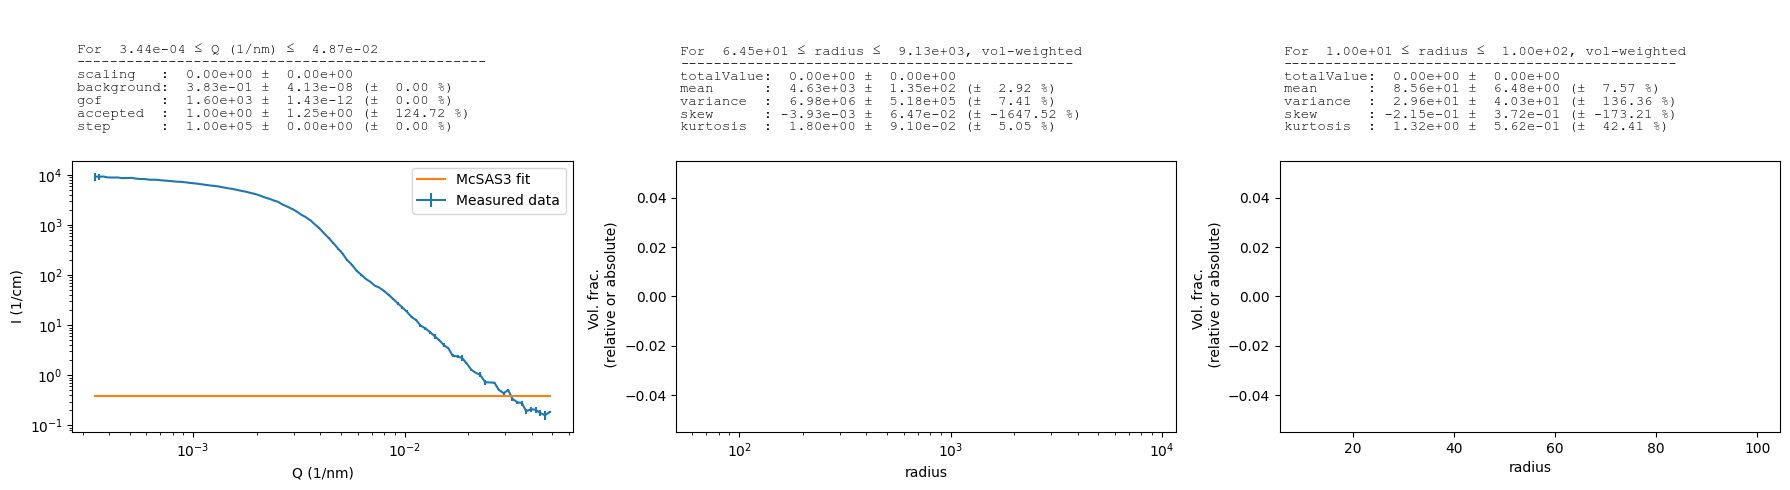

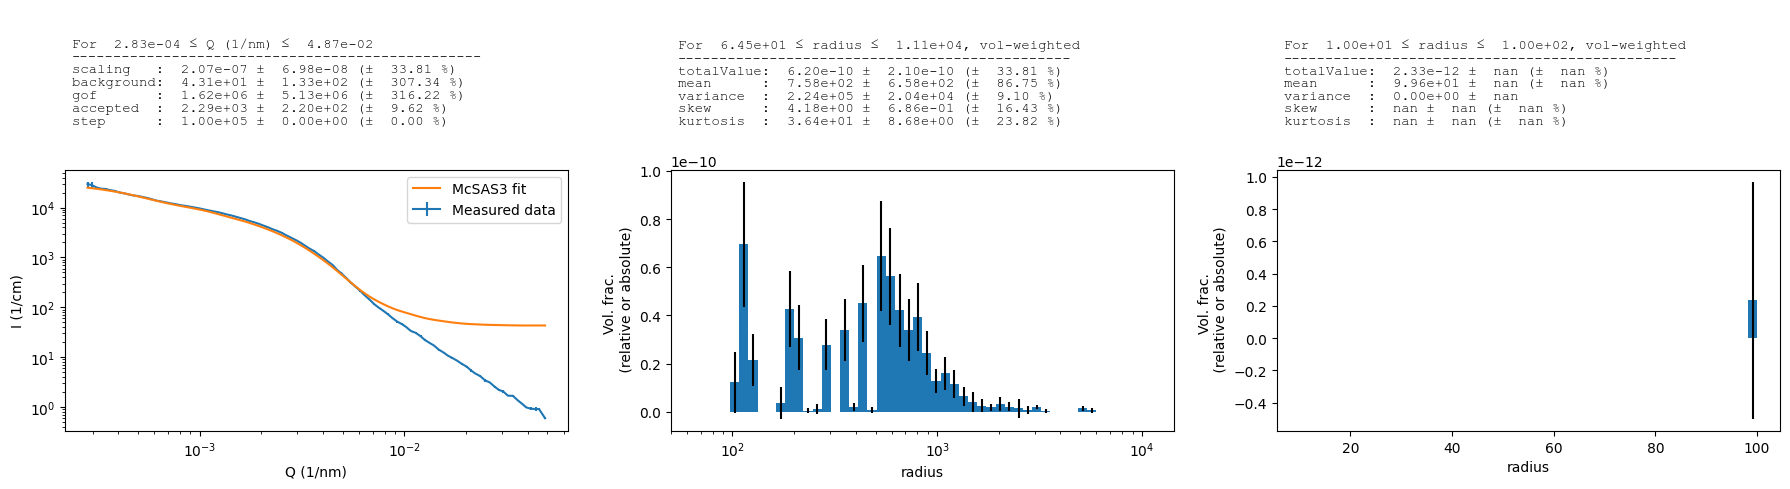

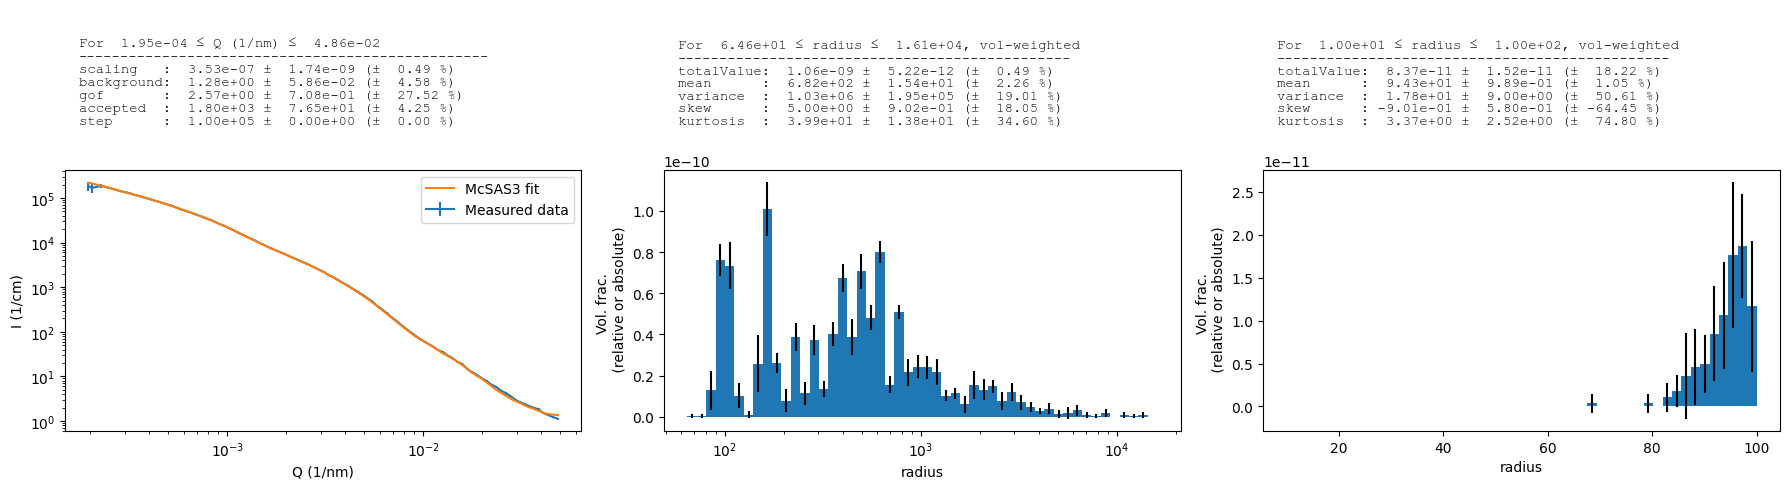

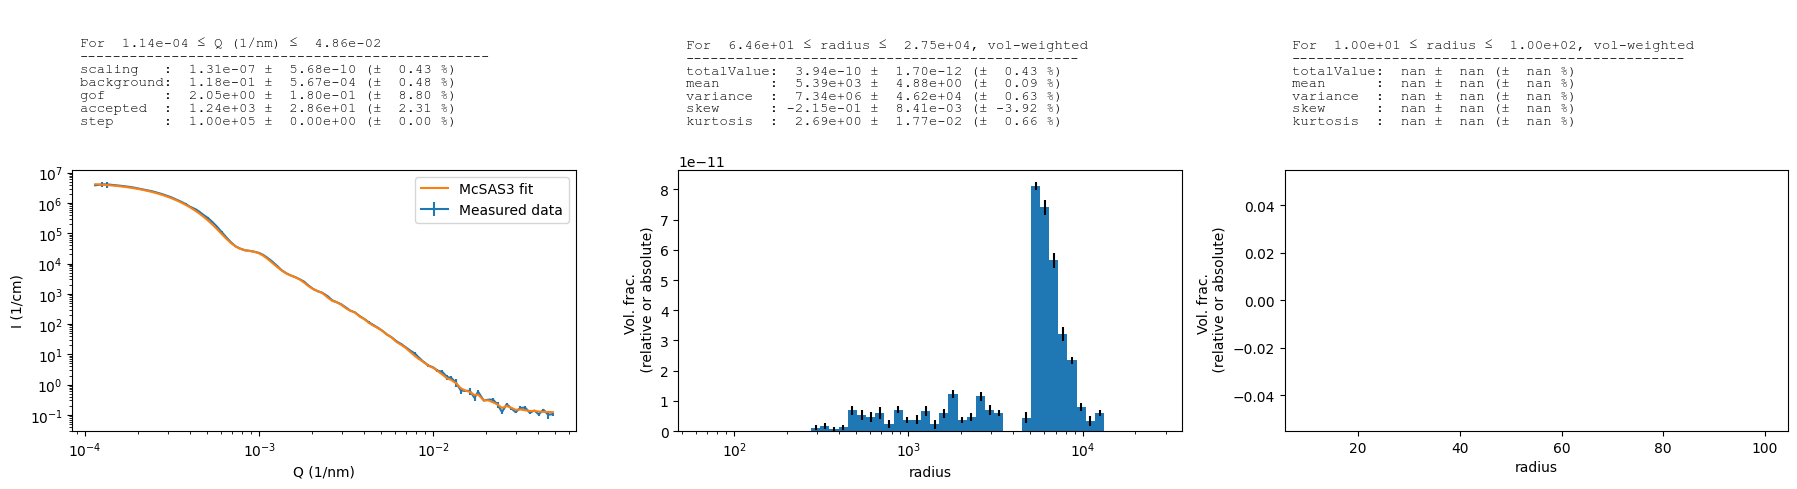

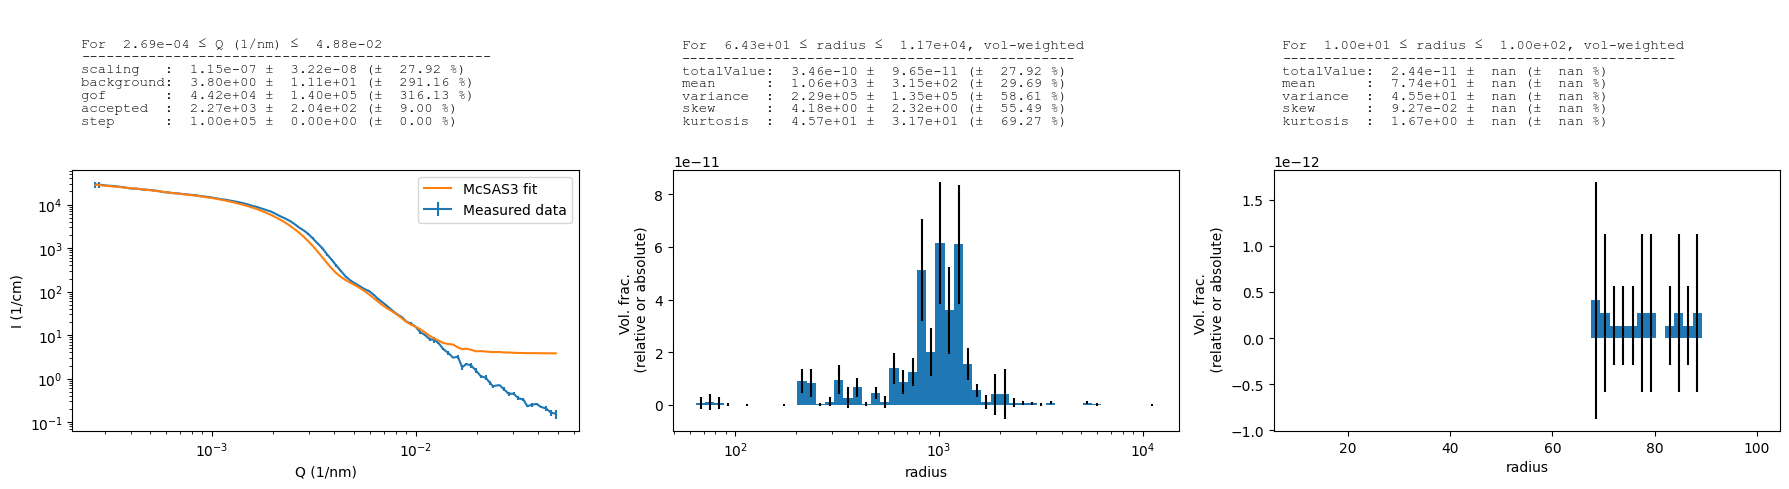

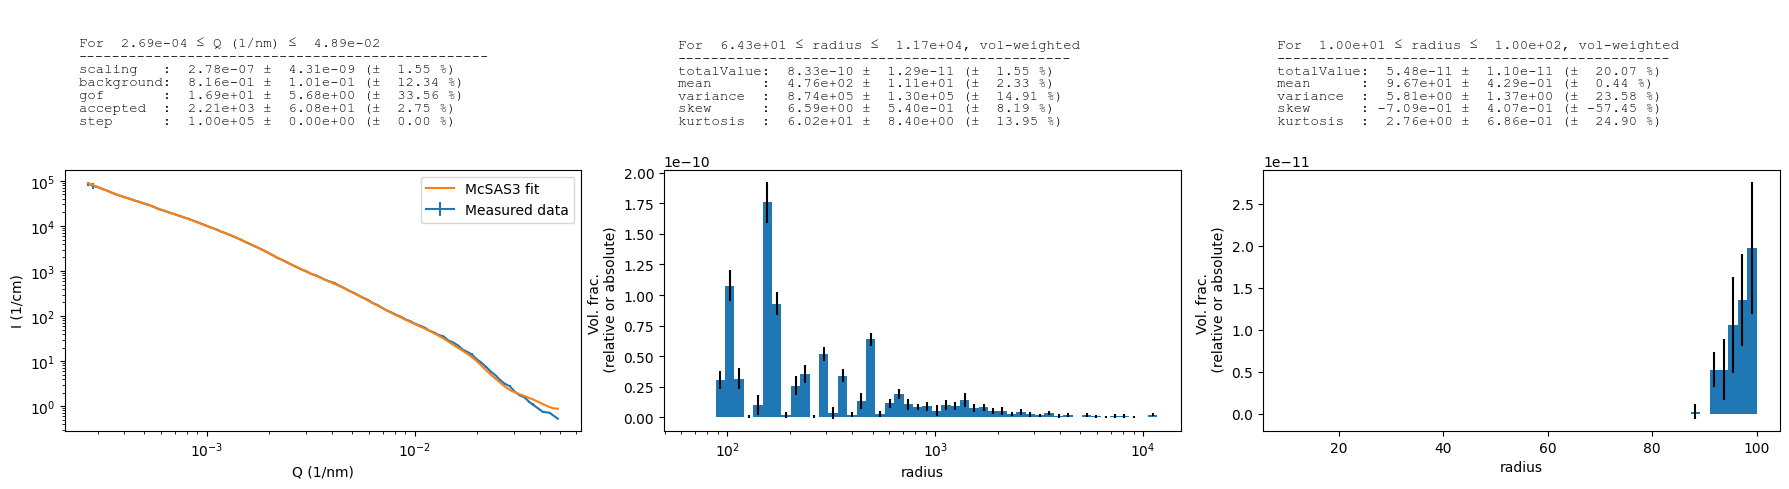

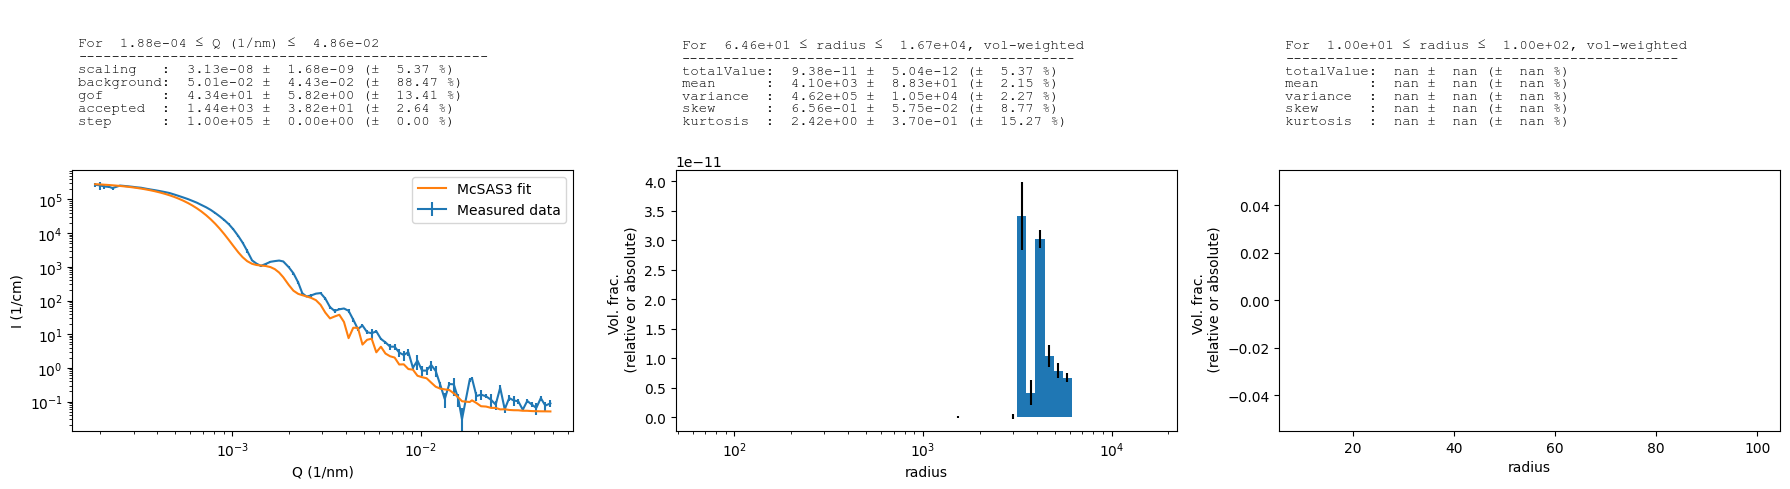

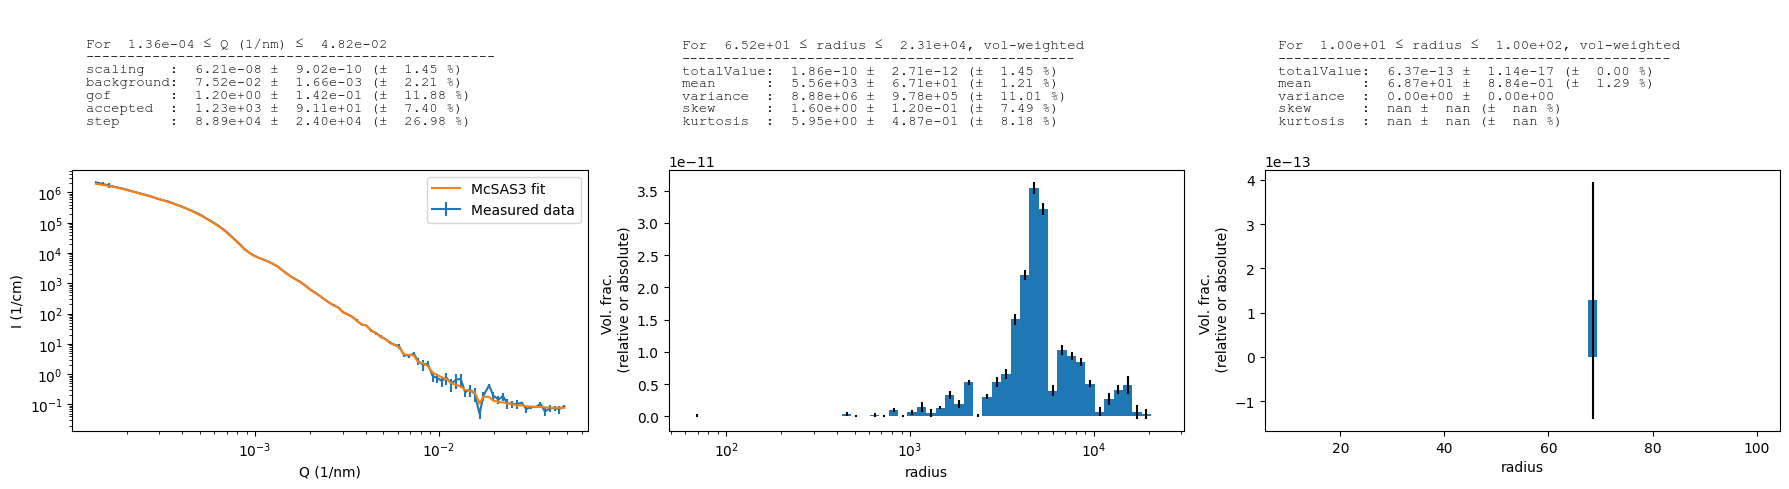

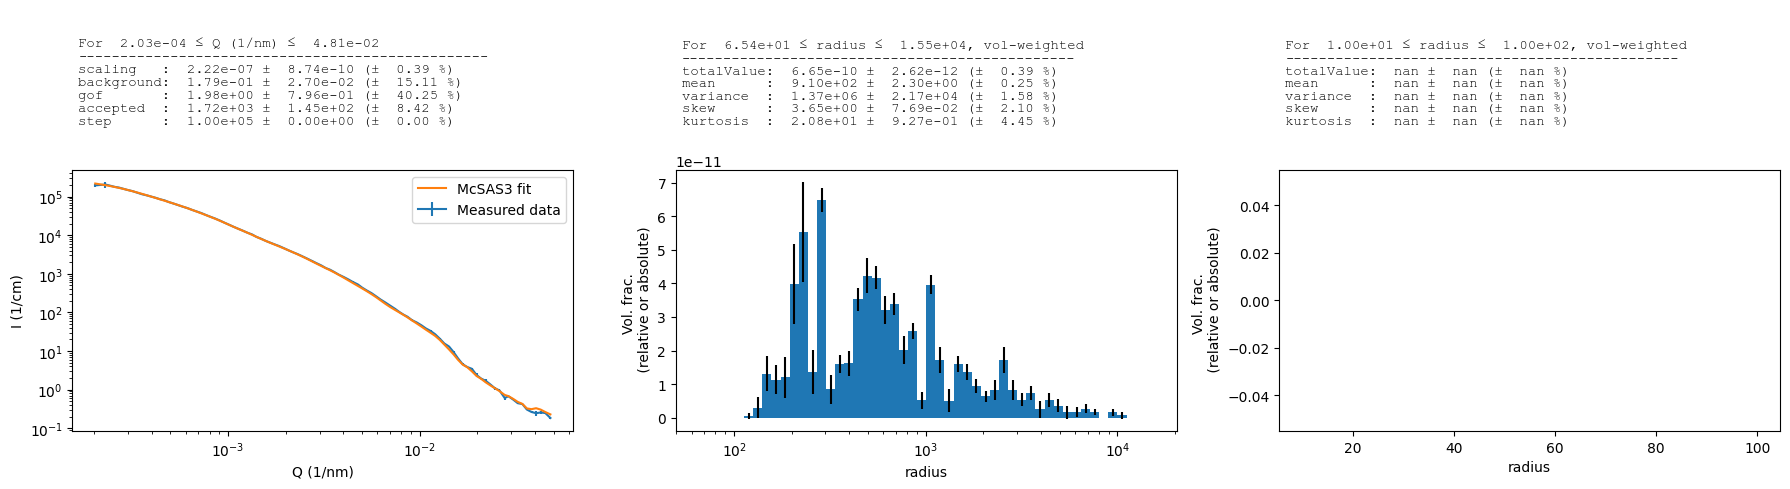

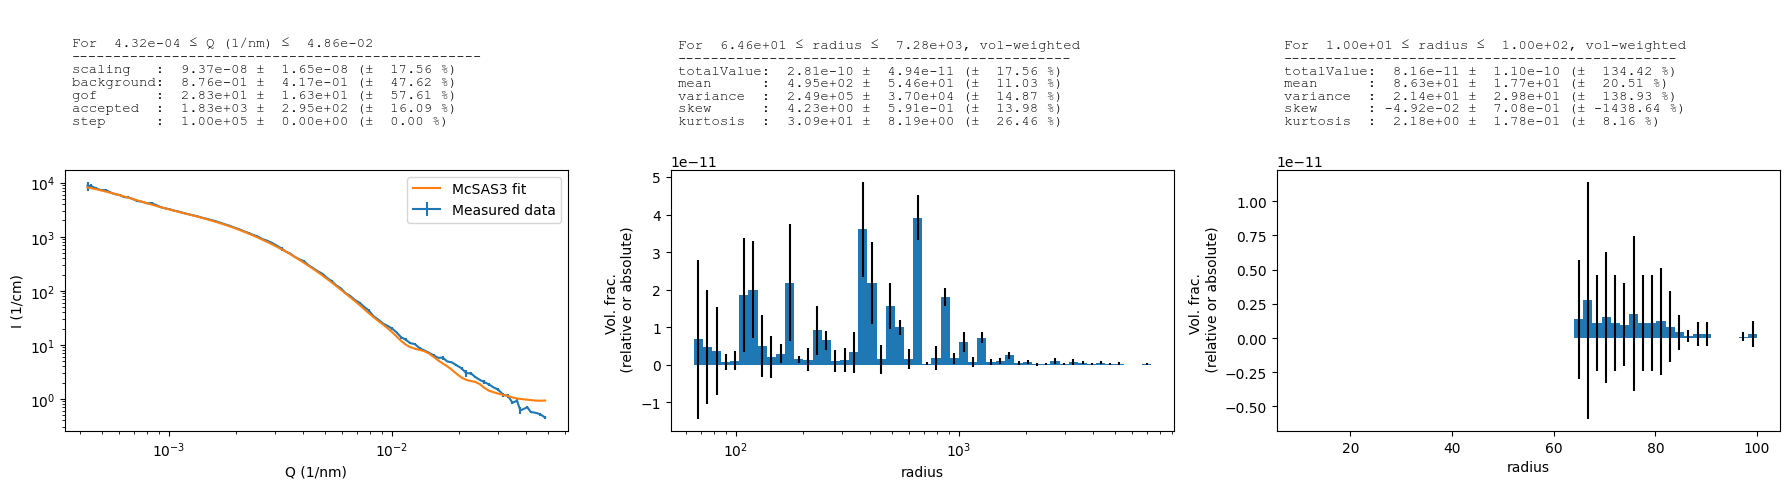

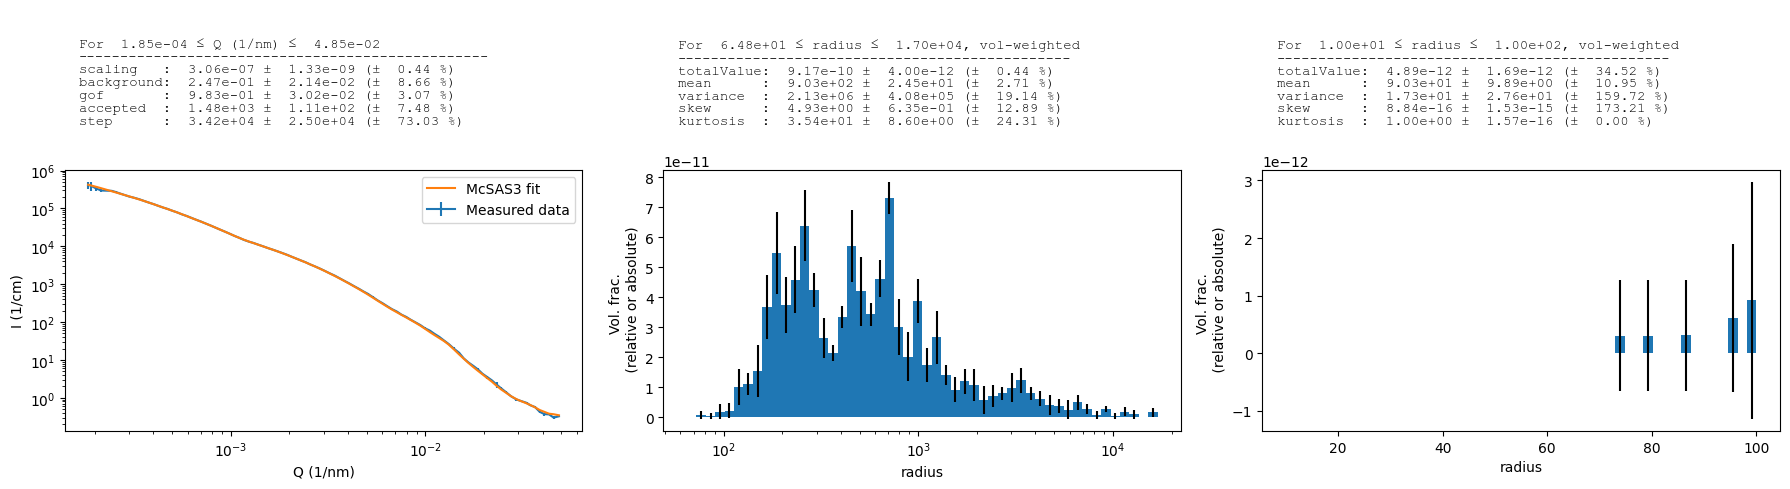

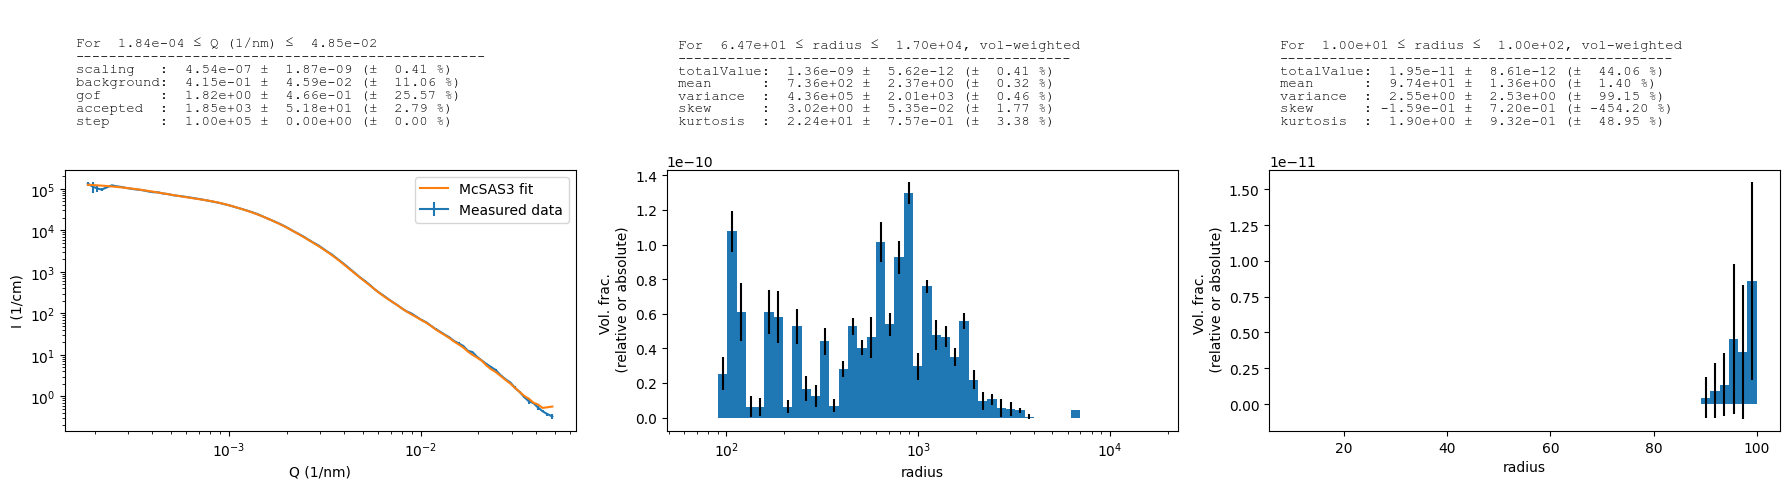

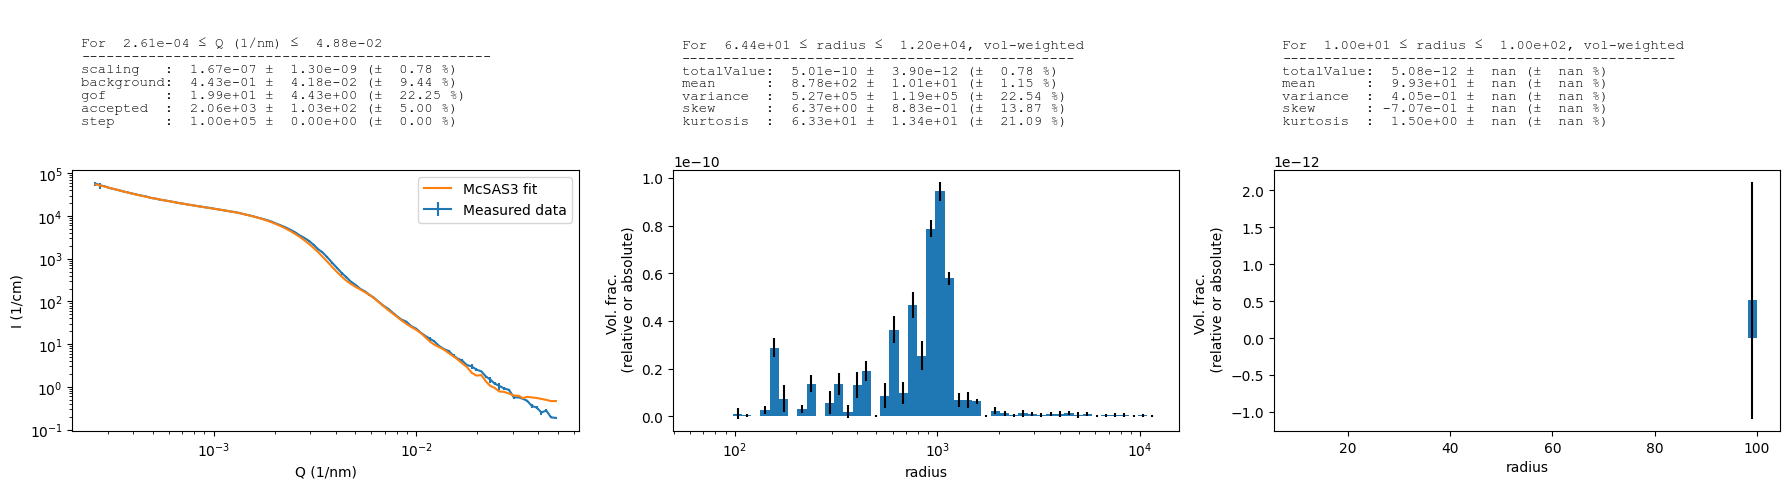

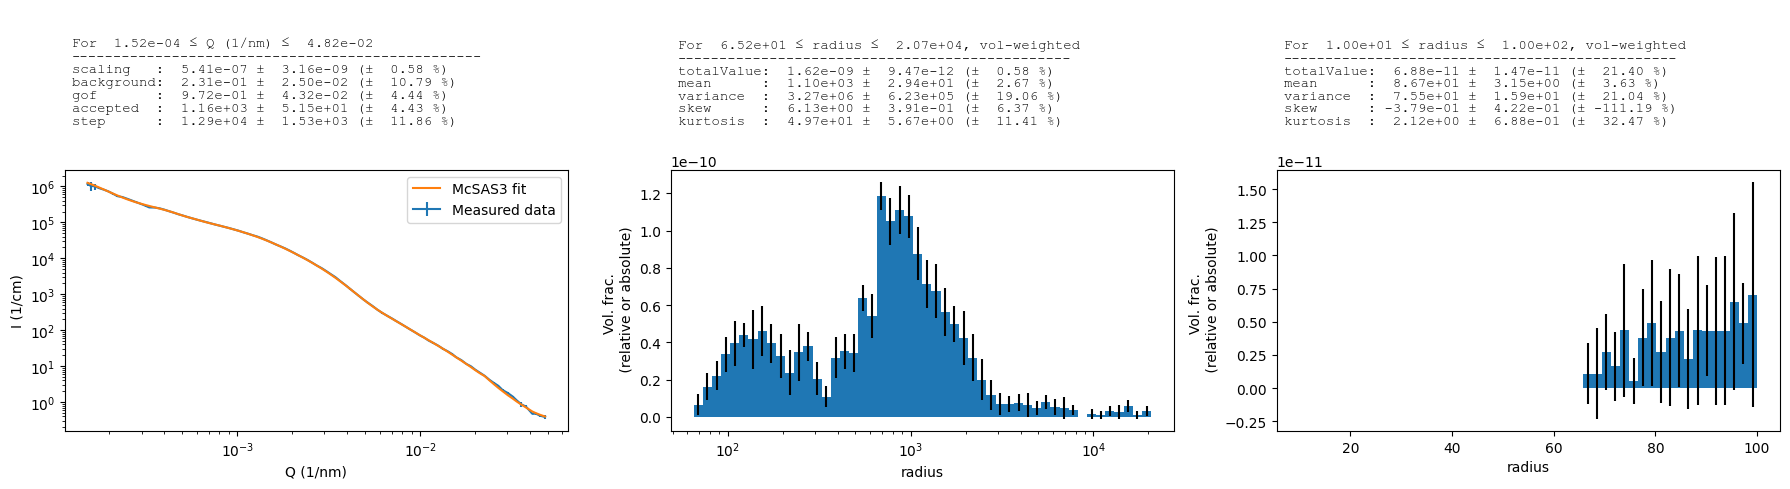

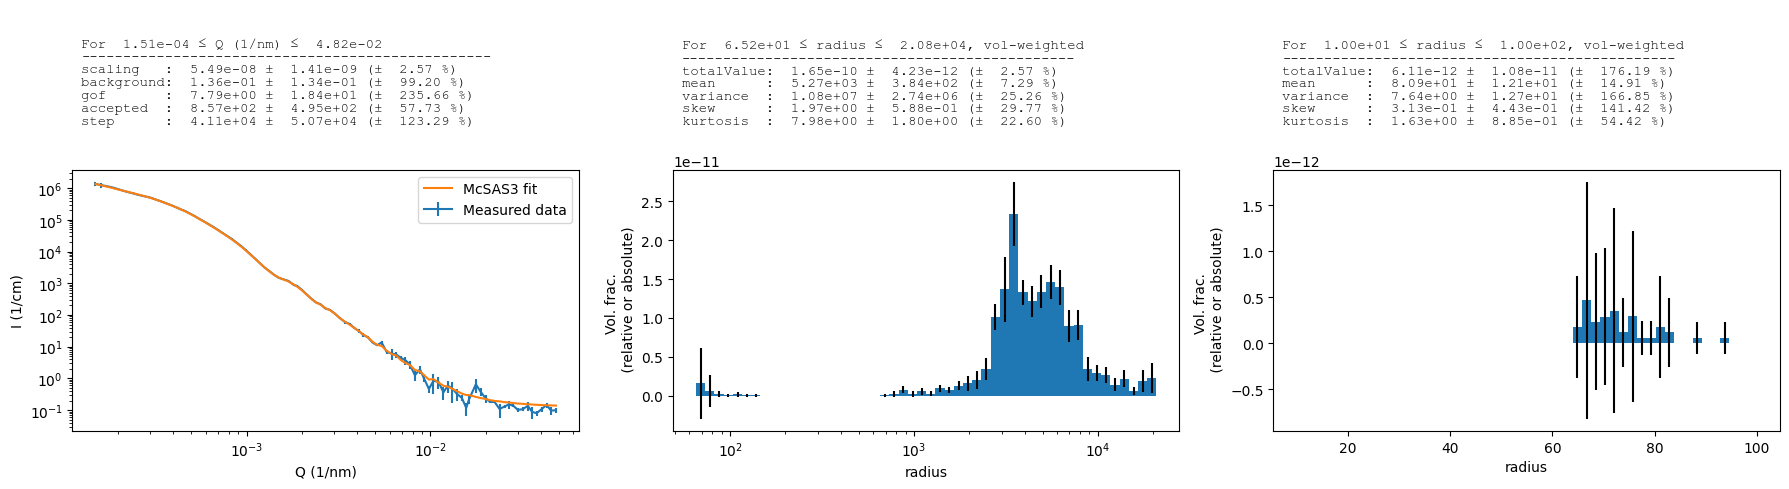

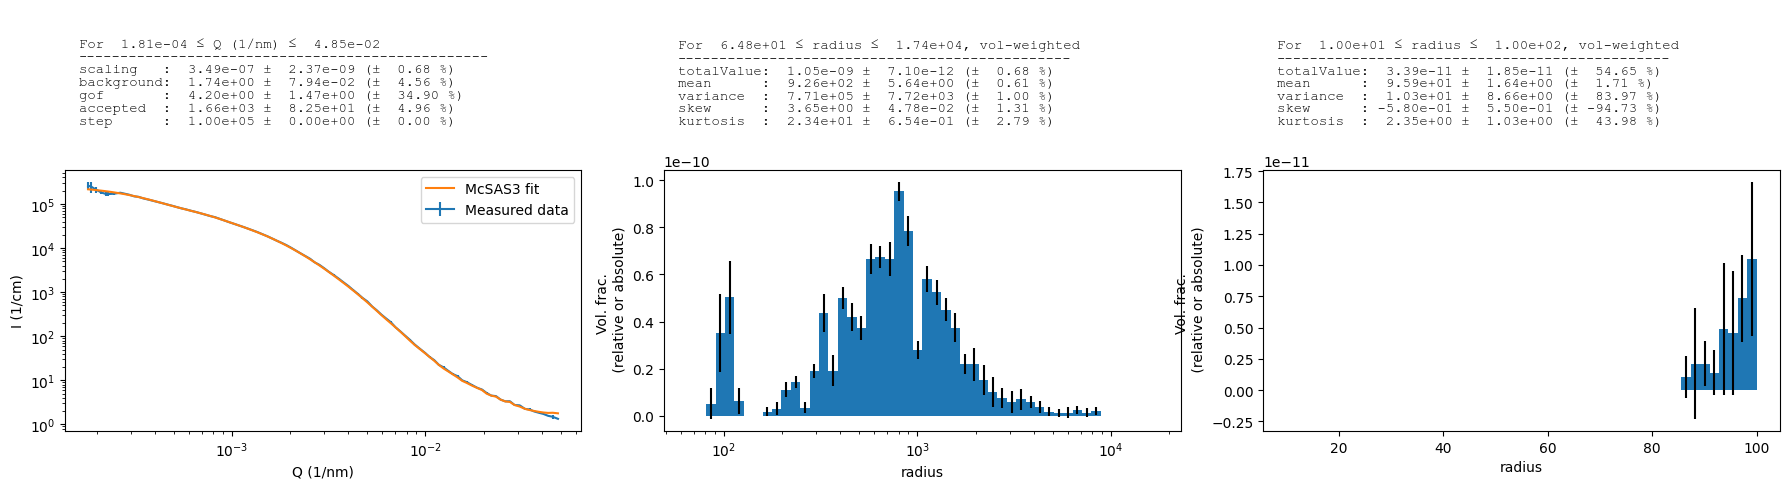

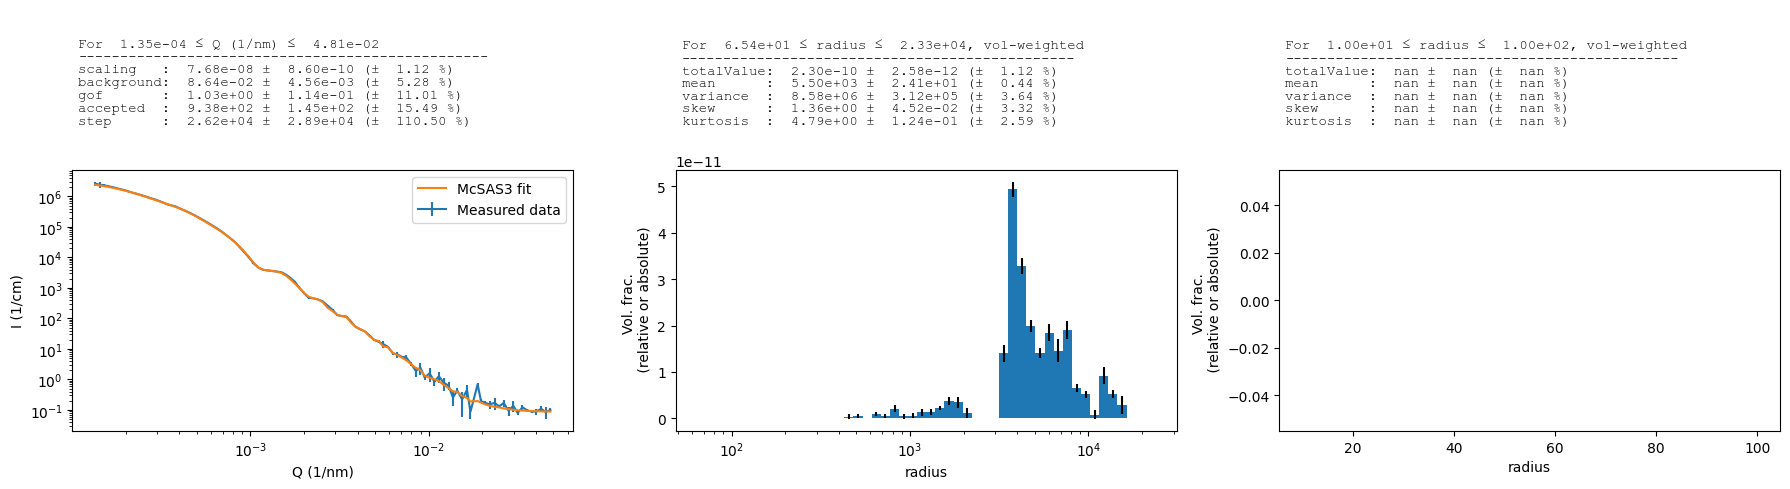

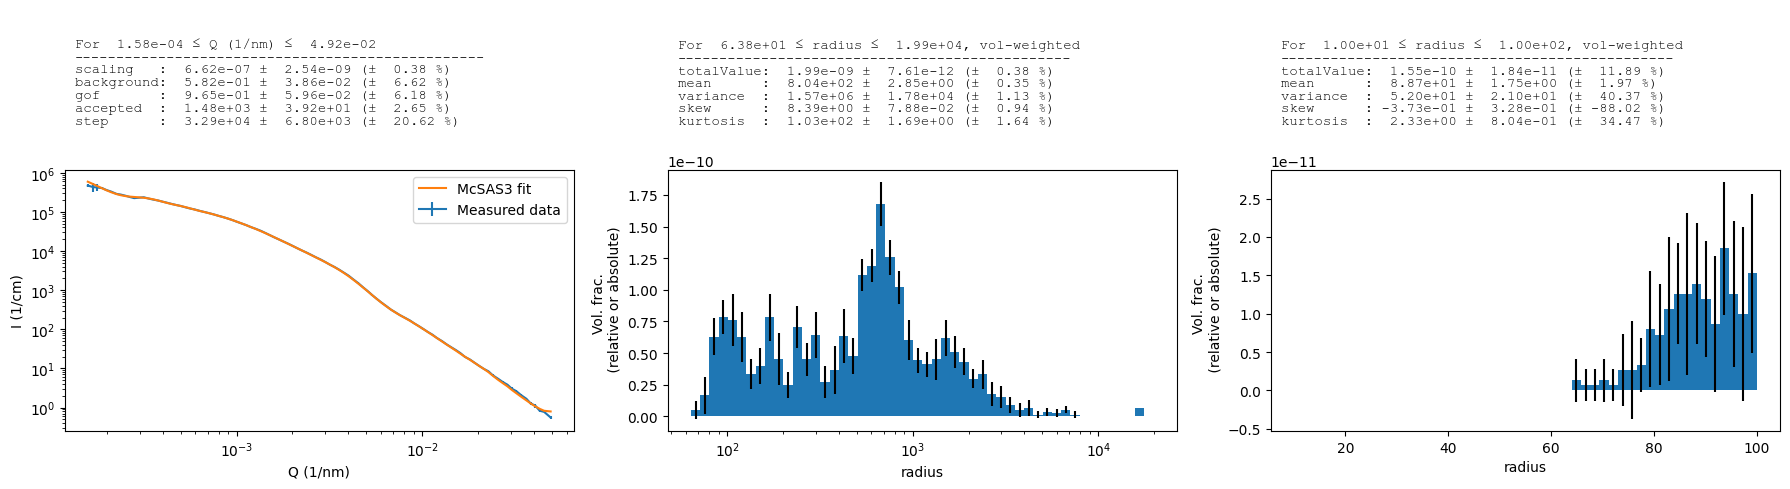

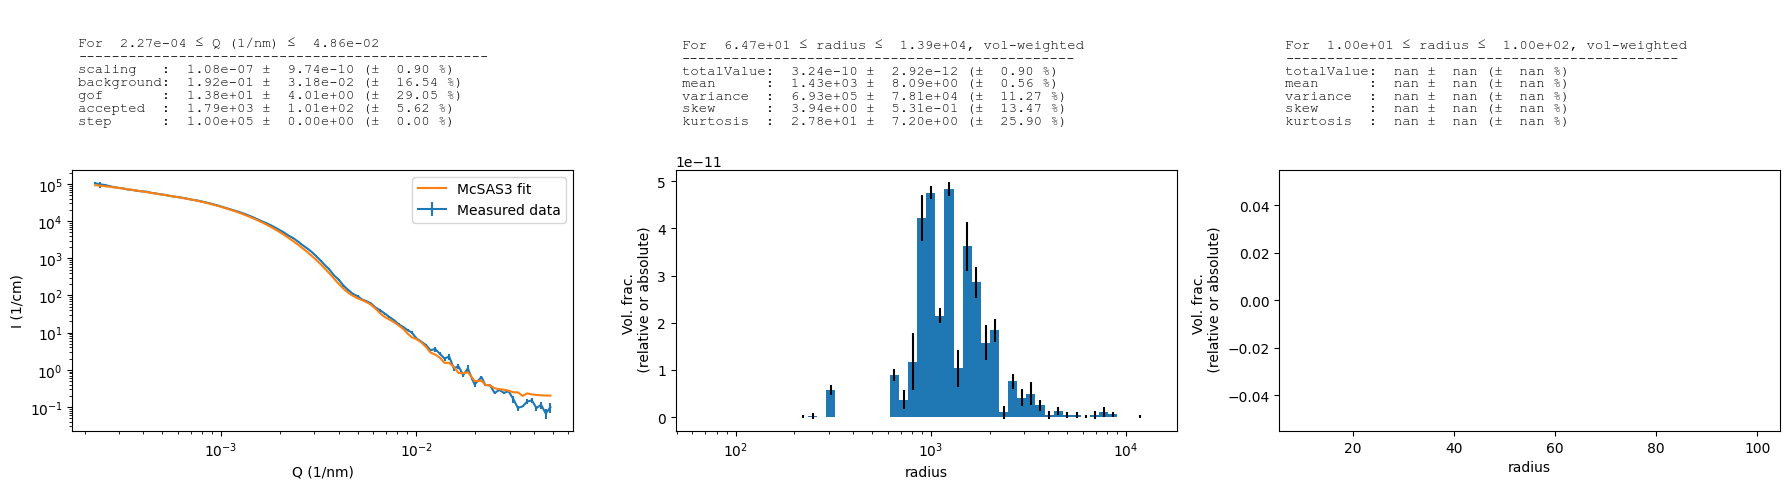

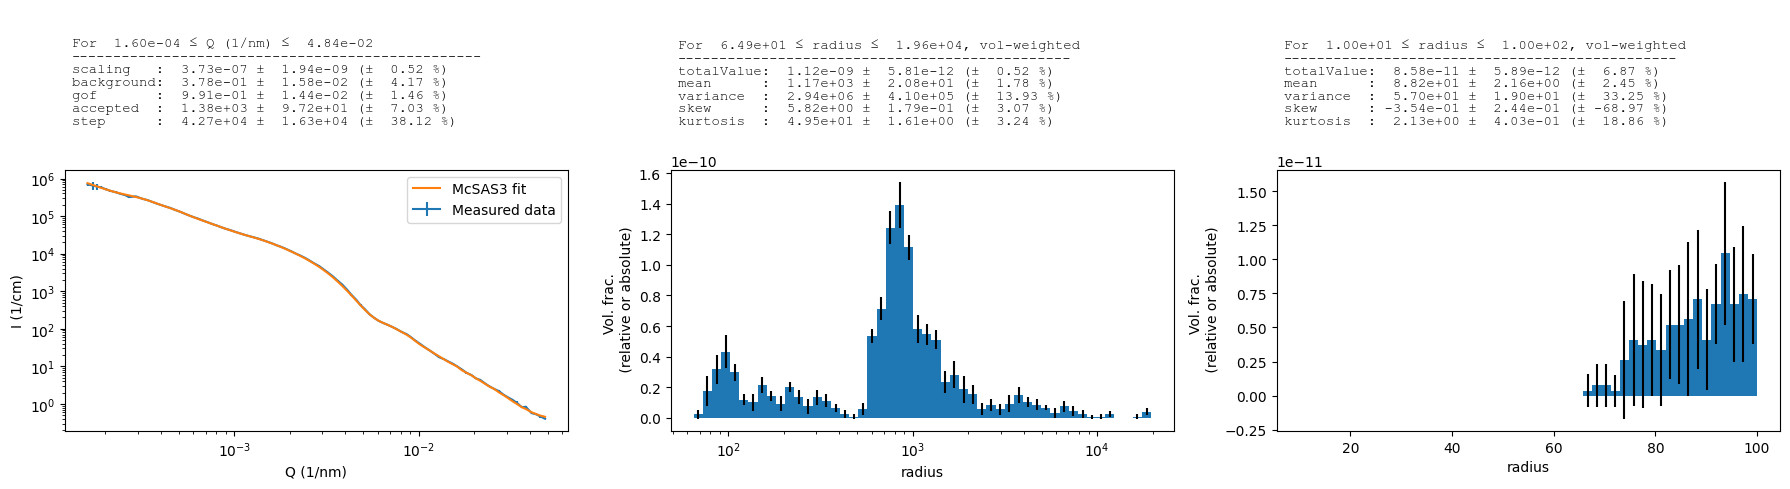

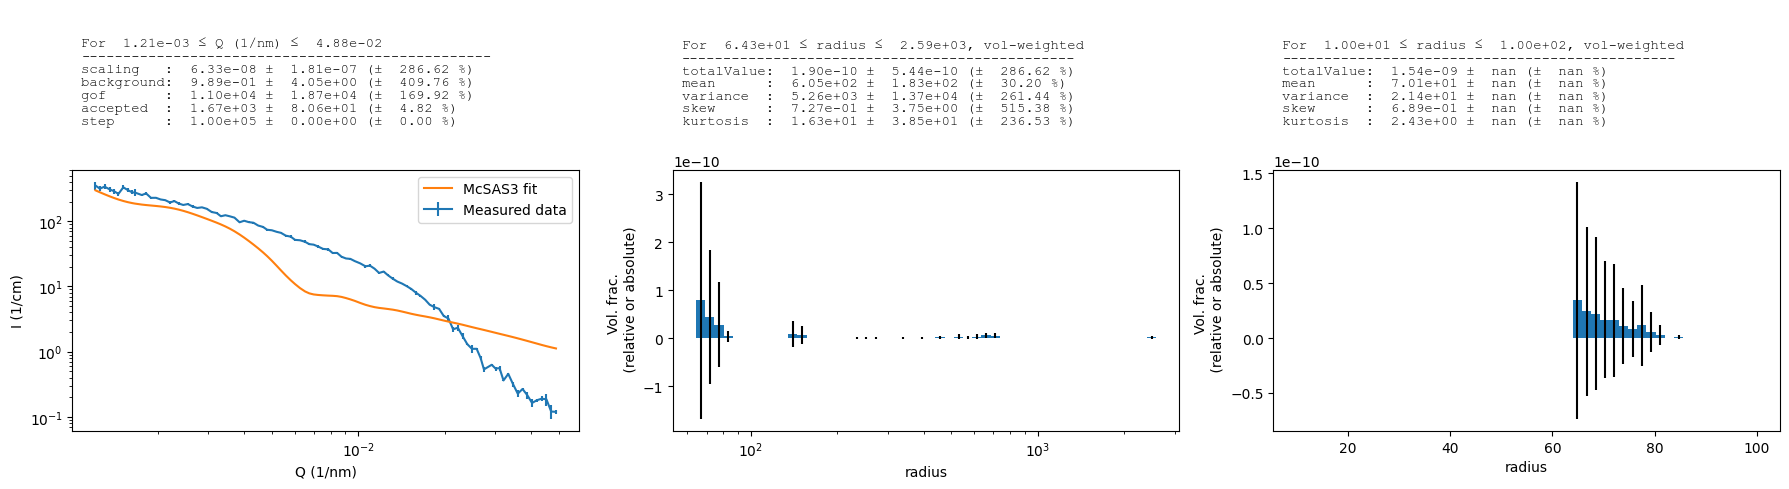

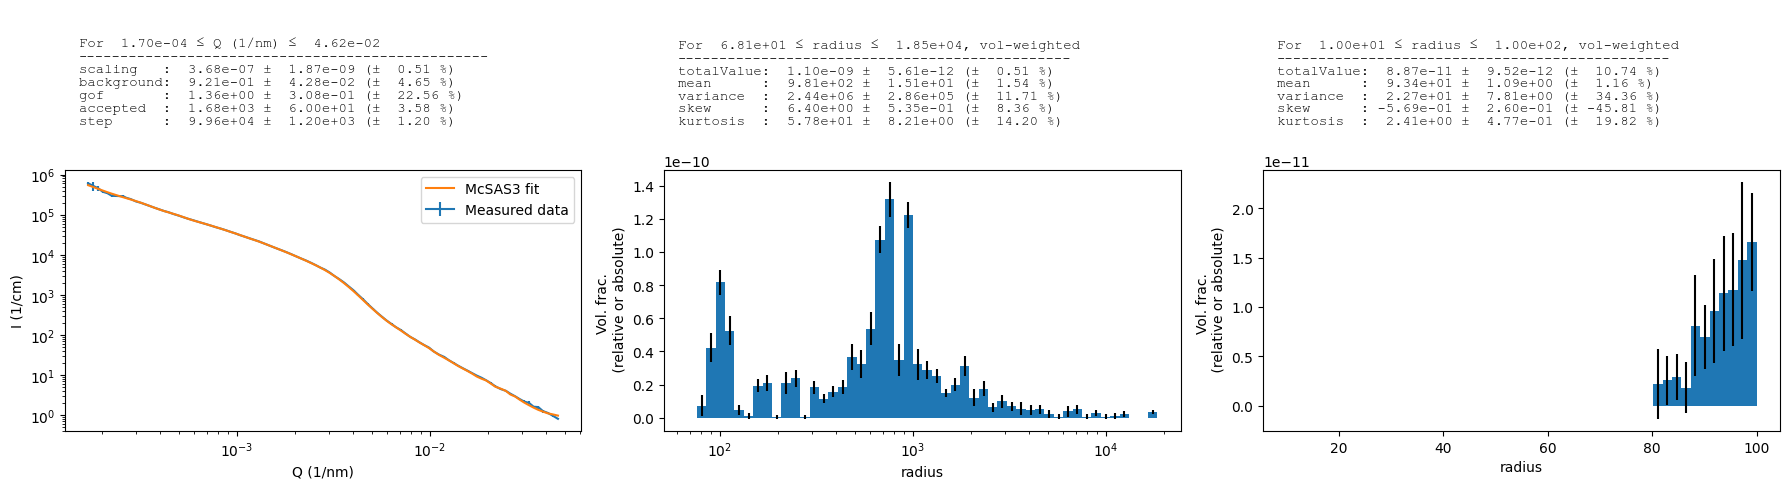

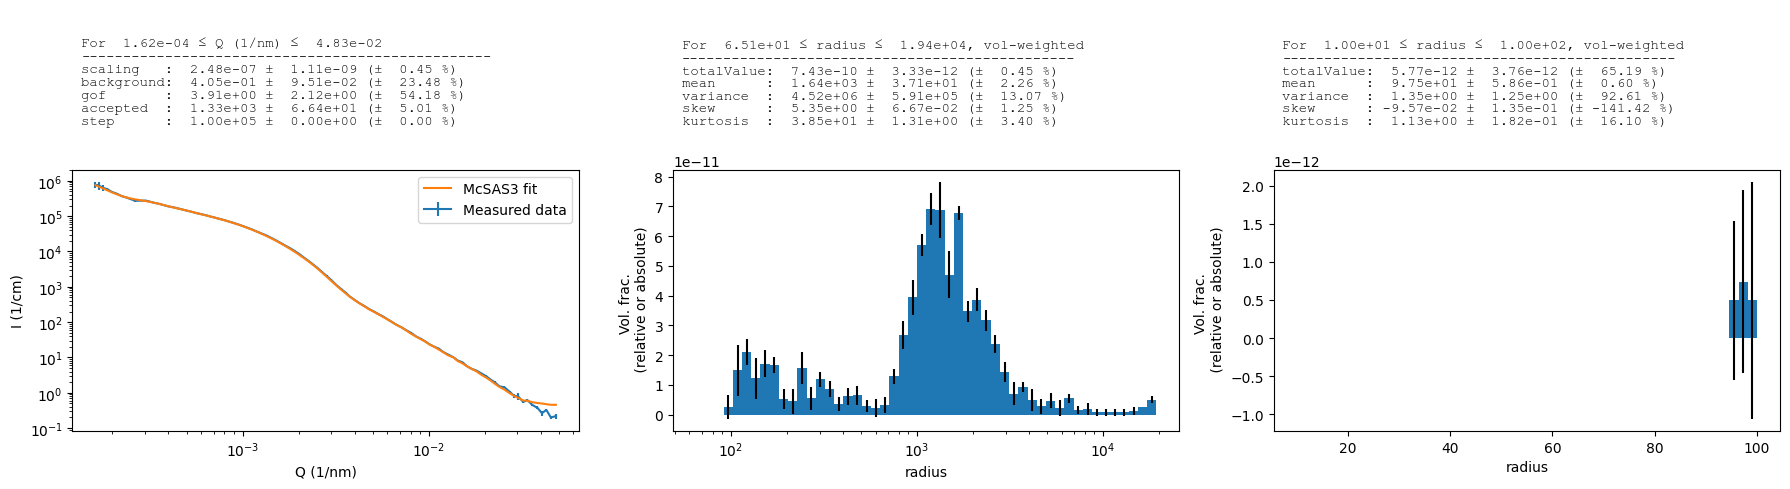

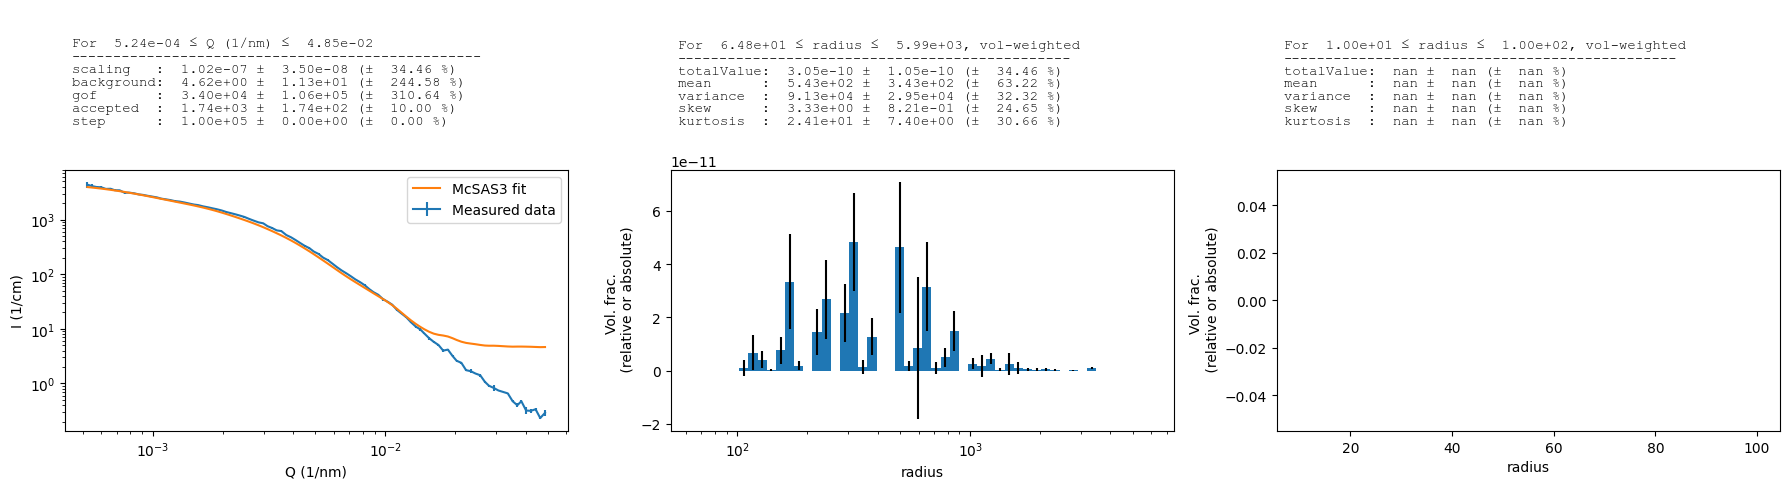

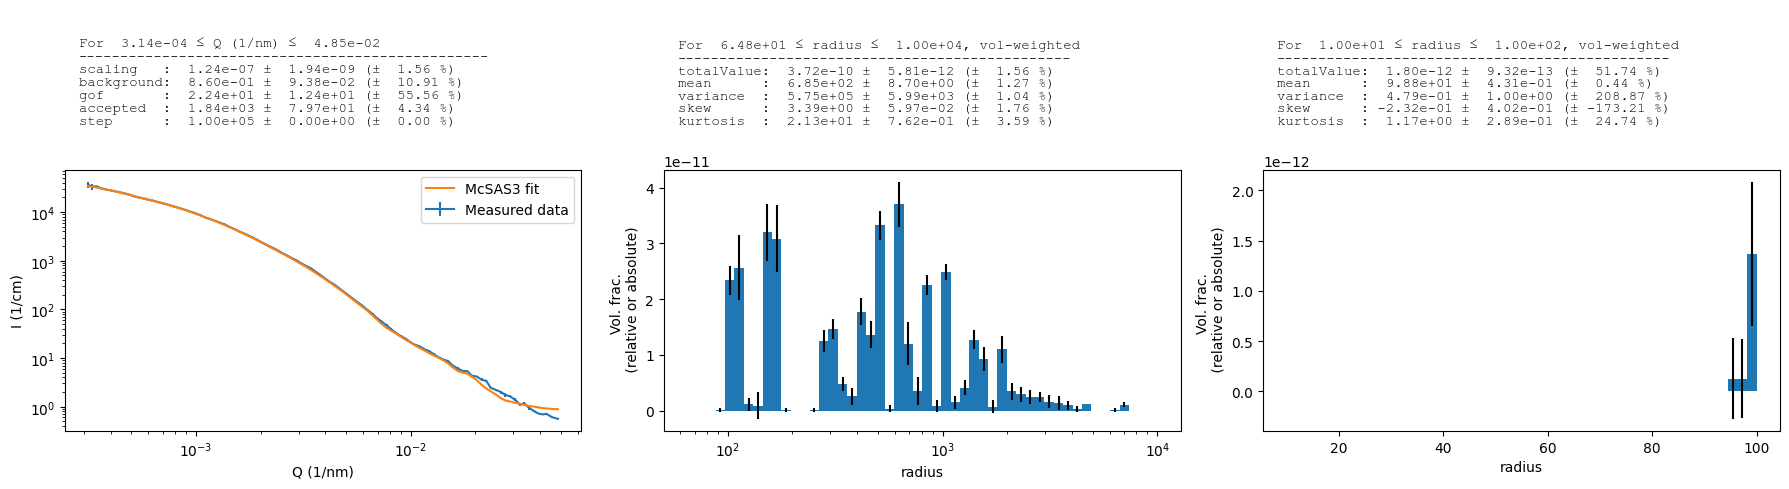

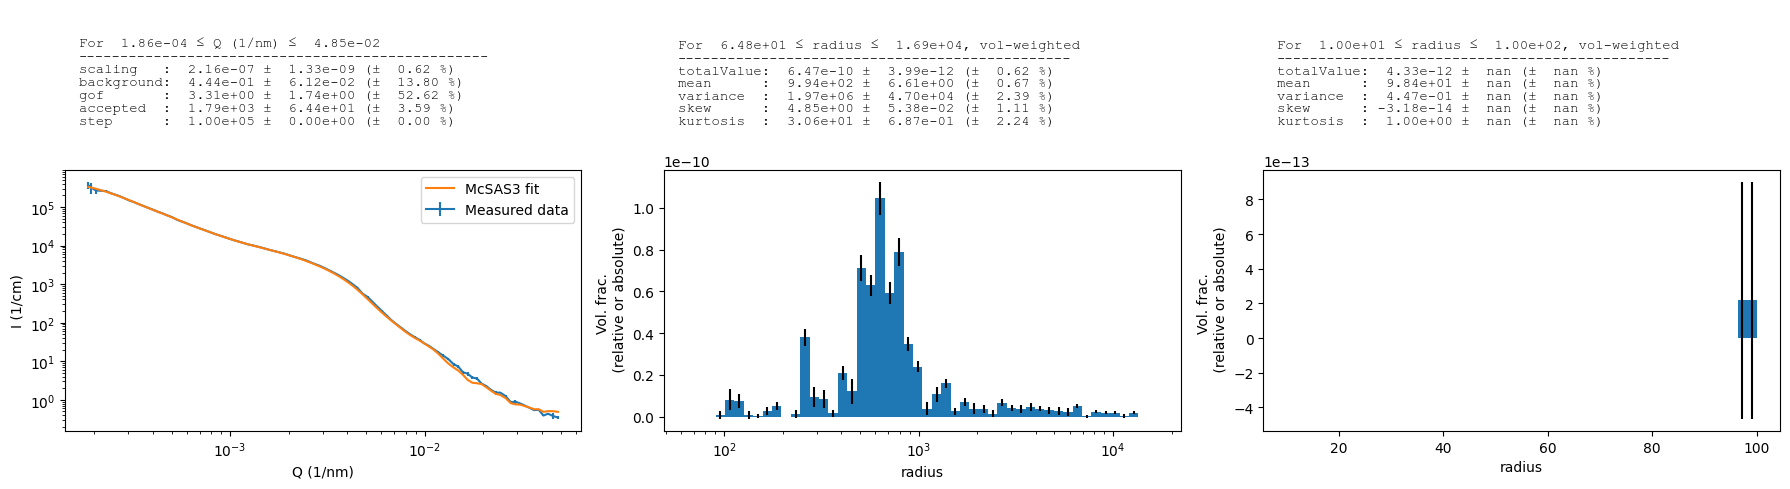

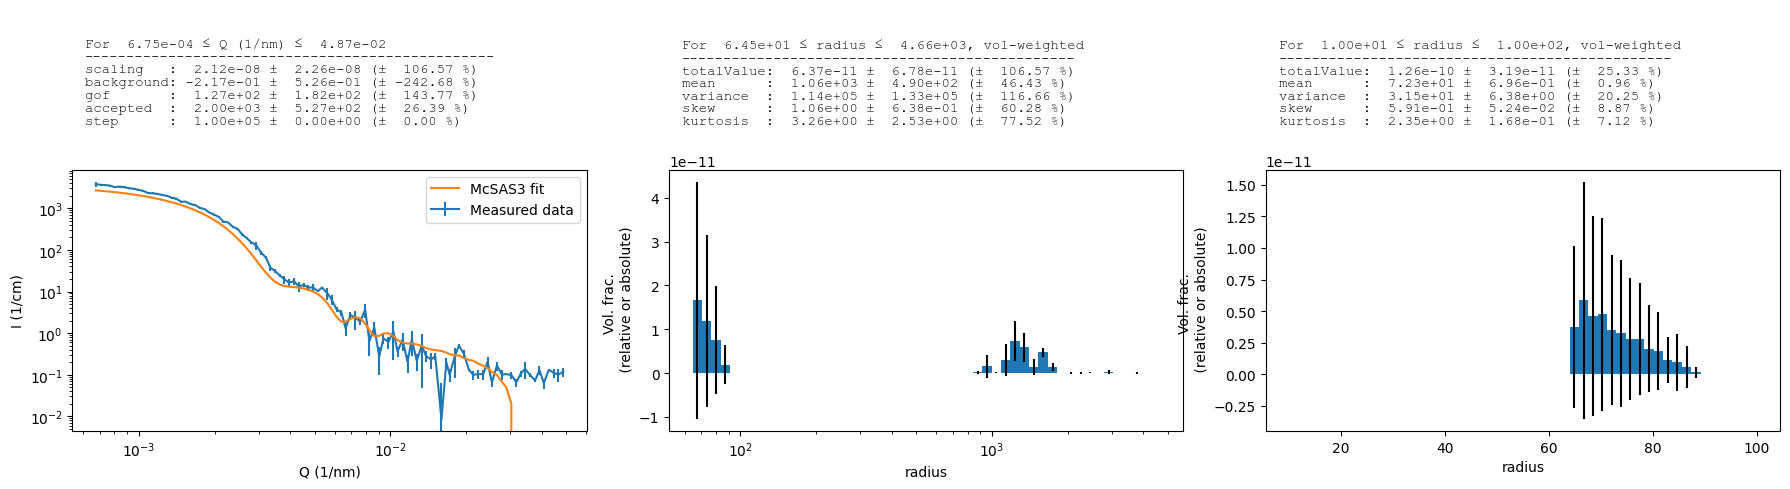

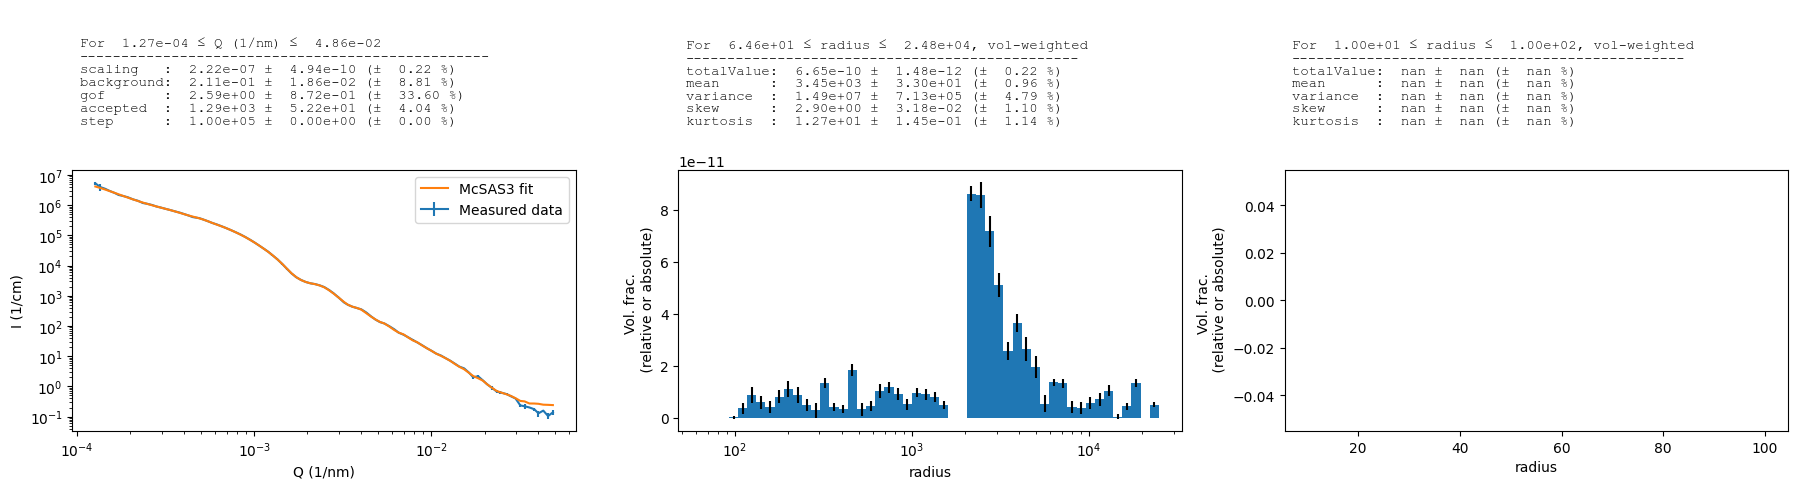

In [46]:
for sample_uid, fp in usaxs_files_mcsas.items():
    print(f"Starting sample {fp.split('/')[-1].split('.')[0]}")
    dataFile = fp
    resultIndex = 1
    result_file = f"mcsas_usaxs_fits/{fp.split('/')[-1].split('.')[0]}.nxs"
    n_threads = 8
    hist_result_file = Path().absolute() / "mcsas_usaxs_hists" / f"{fp.split('/')[-1].split('.')[0]}_hist.nxs"
    

    mds = McData1D.McData1D(loadFromFile=result_file, resultIndex=resultIndex)

    # read the configuration file
    with open(hist_config_fp, "r") as f:
        histRanges = pd.DataFrame(list(yaml.safe_load_all(f)))
    # run the Monte Carlo method
    md = mds.measData.copy()
    mcres = McAnalysis(
        result_file, md, histRanges, store=True, resultIndex=resultIndex
    )

    # plotting:
    # plot the histogram result
    mp = McPlot.McPlot()
    # output file for plot:
    saveHistFile = hist_result_file.with_suffix(".pdf")
    if saveHistFile.is_file():
        saveHistFile.unlink()
    mp.resultCard(mcres, saveHistFile=saveHistFile)

In [50]:
filenames = [fp.split('/')[-1].split('.')[0] for fp in usaxs_files_mcsas.values()]

In [52]:
fp_df = pd.DataFrame({'filename':filenames})

In [54]:
fp_df.to_csv('MCsas_result_screening.csv')

## Try to fix problem fits

In [11]:
filename = '15_c5ce72e5-18c6-44cb-b802-1ee061e79d7c_B8_0_2001'

In [12]:
# read the configuration file
with open(read_config_fp, "r") as f:
        readDict = yaml.safe_load(f)

# read the configuration file
with open(run_config_fp, "r") as f:
        optDict = yaml.safe_load(f)

In [13]:
optDict

{'modelName': 'mcsas_sphere',
 'nContrib': 300,
 'modelDType': 'default',
 'fitParameterLimits': {'radius': 'auto'},
 'staticParameters': {'sld': 33.4, 'sld_solvent': 0},
 'maxIter': 100000,
 'convCrit': 1,
 'nRep': 10,
 'nCores': 5}

In [19]:
optDict['staticParameters']['sld'] = 8.575
optDict['staticParameters']['sld_solvent'] = 9.469
optDict['nRep'] = 20
optDict['nContrib'] = 1000
optDict['fitParameterLimits'] = {'radius':[np.float64(64.32), np.float64(25000)]}
optDict['maxIter'] = 1000000

In [20]:
dataFile

'/Users/bgpelkie/My Drive/Research/PozzoResearchGroup/APS_Beamtime_Sp25/BatchSamplesData/McSAS_reduced_nm/15_c5ce72e5-18c6-44cb-b802-1ee061e79d7c_B8_0_2001.dat'

In [21]:

dataFile = f'{new_fp_root}/{filename}.dat'
resultIndex = 1
result_file = f"mcsas_usaxs_fixfits/{filename}.nxs"
n_threads = 8


# load the data
mds = McData1D.McData1D(filename=dataFile, resultIndex=resultIndex, **readDict)
# store the full data in the result file:
mds.store(result_file)

if n_threads > 0:
    optDict["nCores"] = n_threads
# run the Monte Carlo method
mh = McHat.McHat(seed=None, resultIndex=resultIndex, **optDict)
md = mds.measData.copy()
mh.run(md, result_file, resultIndex = resultIndex)

McSAS analysis with 20 repetitions took 2255.5s with 8 threads.
Optimization of repetition 0 started:
chiSqr: 1307.75613556208, N accepted: 0 / 0
chiSqr: 1307.75613556208, N accepted: 0 / 1
chiSqr: 1177.6518583812995, N accepted: 488 / 1001
chiSqr: 1087.2466066504533, N accepted: 843 / 2001
chiSqr: 1023.5440862791588, N accepted: 1097 / 3001
chiSqr: 949.8045927487756, N accepted: 1311 / 4001
chiSqr: 873.2381247638998, N accepted: 1499 / 5001
chiSqr: 807.8685015787901, N accepted: 1658 / 6001
chiSqr: 781.2206810475432, N accepted: 1804 / 7001
chiSqr: 743.0219090513237, N accepted: 1923 / 8001
chiSqr: 705.7265484992233, N accepted: 2041 / 9001
chiSqr: 673.0714164618475, N accepted: 2141 / 10001
chiSqr: 639.7616390210252, N accepted: 2230 / 11001
chiSqr: 612.6476750585396, N accepted: 2317 / 12001
chiSqr: 584.1781650087145, N accepted: 2395 / 13001
chiSqr: 569.2555926865033, N accepted: 2465 / 14001
chiSqr: 529.3549841075275, N accepted: 2552 / 15001
chiSqr: 514.9762076305627, N accepted:

In [22]:
dataFile

'/Users/bgpelkie/My Drive/Research/PozzoResearchGroup/APS_Beamtime_Sp25/BatchSamplesData/McSAS_reduced_nm/15_c5ce72e5-18c6-44cb-b802-1ee061e79d7c_B8_0_2001.dat'

loadKV(/analyses/MCResult1/mcdata/filename)
loadKV(/analyses/MCResult1/mcdata/measDataLink)
loadKV(/analyses/MCResult1/mcdata/nbins)
loadKV(/analyses/MCResult1/mcdata/IEmin)
loadKV(/analyses/MCResult1/mcdata/binning)
loadKV(/analyses/MCResult1/mcdata/dataRange)
loadKV(/analyses/MCResult1/mcdata/csvargs)
loadKV(/analyses/MCResult1/mcdata/loader)
loadKV(/analyses/MCResult1/mcdata/omitQRanges)
Getting List of repetitions...
10 repetitions found in McSAS file mcsas_usaxs_fits/15_c5ce72e5-18c6-44cb-b802-1ee061e79d7c_B8_0_2001.nxs
Histogramming every repetition and extracting elements to average...
Averaging population modes...
Averaging histograms...
Averaging optimization parameters...
Averaging model intensity...
Storing averages...


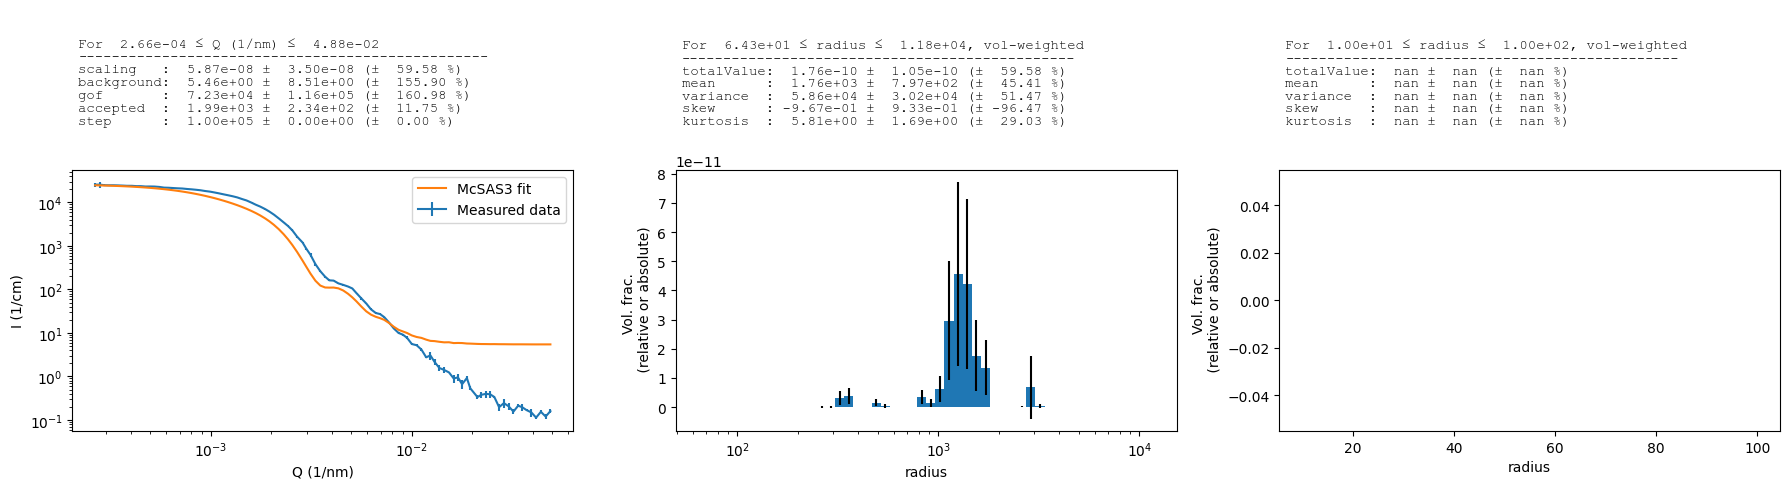

In [23]:

resultIndex = 1
result_file = f"mcsas_usaxs_fits/{filename}.nxs"
n_threads = 8
hist_result_file = Path().absolute() / "mcsas_usaxs_fixfits" / f"{filename}_hist.nxs"


mds = McData1D.McData1D(loadFromFile=result_file, resultIndex=resultIndex)

# read the configuration file
with open(hist_config_fp, "r") as f:
    histRanges = pd.DataFrame(list(yaml.safe_load_all(f)))
# run the Monte Carlo method
md = mds.measData.copy()
mcres = McAnalysis(
    result_file, md, histRanges, store=True, resultIndex=resultIndex
)

# plotting:
# plot the histogram result
mp = McPlot.McPlot()
# output file for plot:
saveHistFile = hist_result_file.with_suffix(".pdf")
if saveHistFile.is_file():
    saveHistFile.unlink()
mp.resultCard(mcres, saveHistFile=saveHistFile)